# Single member analyses of models with future scenarios

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import LSQUnivariateSpline

datapath = '../Processed_data/Nino3_4_monthly/'
experiments = ['piControl', 'historical', 'ssp126', 'ssp245', 'ssp370', 'ssp585']
models = ['BCC-CSM2-MR', 'CanESM5', 'CNRM-CM6-1', 'CNRM-ESM2-1', 'MIROC-ES2L', 
          'MIROC6', 'UKESM1-0-LL', 'MRI-ESM2-0',  'CESM2', 'CESM2-WACCM', 'MCM-UA-1-0']

# create dictionary of data for each model, containing only the member we want to use:
data_dict = {}
for model in models:
    data_dict[model] = {}
    
    file = datapath + model + '_nino3_4monthlyindex.txt'
    data_table = pd.read_csv(file, index_col=0, header=[0,1], keep_default_na = False)
    if model in ['BCC-CSM2-MR', 'CanESM5', 'MIROC6', 'MRI-ESM2-0', 'CESM2-WACCM']:
        for exp in experiments:
            member = 'r1i1p1f1'
            data_list = data_table[exp][member].values
            data_dict[model][exp] = np.array([np.float(i) for i in data_list if i])
    elif model in ['MIROC-ES2L', 'CNRM-CM6-1','MCM-UA-1-0', 'UKESM1-0-LL']:
        for exp in experiments:
            if exp == 'piControl' and model == 'MCM-UA-1-0':
                member = 'r1i1p1f1'
            else:
                member = 'r1i1p1f2' # I have checked that historical f2 branches from piControl f1 in MCM-UA-1-0.
            if exp in data_table: # additional if-test here, since 'MCM-UA-1-0' is missing the 'ssp126' experiment
                data_list = data_table[exp][member].values
                data_dict[model][exp] = np.array([np.float(i) for i in data_list if i])         
    elif model in ['CNRM-ESM2-1']:
        for exp in experiments:
            if exp == 'piControl':
                member = 'r1i1p1f2'
            else: 
                member = 'r2i1p1f2' # I have checked that historical r2 branches from piControl r1.
            data_list = data_table[exp][member].values
            data_dict[model][exp] = np.array([np.float(i) for i in data_list if i])  
    elif model in ['CESM2']:
        for exp in experiments:
            if exp == 'piControl':
                member = 'r1i1p1f1'
            else: 
                member = 'r4i1p1f1' # I have checked that historical r4 branches from piControl r1.
            data_list = data_table[exp][member].values
            data_dict[model][exp] = np.array([np.float(i) for i in data_list if i]) 
# We know from testing in Figure 1 that all time series for these members are long enough (no missing years)

/ncar/usr/jupyterhub/envs/cmip6-201910a/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Choose a model

In [2]:
model = models[8]
model

'CESM2'

ssp126
ssp245
ssp370
ssp585


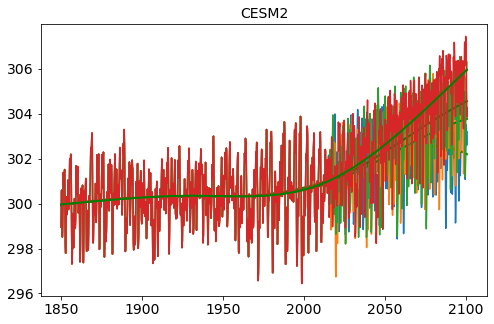

In [3]:
fig, ax = plt.subplots(figsize = [8,5])

internal_knots = [1850 + (2014-1850)/2, 2014] # = historical midpoint (1932) and endpoint (2014)

hist_years = np.arange(1850 + 0.5/12 + 1/12, 2015-1/12, 1/12)
ssp_years = np.arange(2015+ 0.5/12, 2101-1/12, 1/12)
all_years = np.arange(1850 + 0.5/12 + 1/12, 2101-1/12, 1/12)
ssp_length = 86*12-1; # cut in year 2100. Some exp go beyond this year.

hist_data = data_dict[model]['historical']
hist_trends = {}

# combine historical and ssp data, then smooth the combined time series
# to minimize discontinuity of the trend between years 2014 - 2015
for exp in data_dict[model].keys():
    if exp not in ['piControl', 'historical']:
        print(exp)
        ssp_data = data_dict[model][exp][:ssp_length]
        # approximate missing end of historical by a mean
        exp_data = np.concatenate((hist_data, [np.mean([hist_data[-1], ssp_data[0]])], ssp_data))
        plt.plot(all_years, exp_data) 
        spl = LSQUnivariateSpline(all_years, exp_data, internal_knots)
        ax.plot(all_years, spl(all_years), 'g', lw=2)

ax.set_title(model, fontsize = 14)
ax.tick_params(axis='both',labelsize=14)   
#ax.set_xlim(2000, 2020)
#ax.set_ylim(299, 301)

## Loop through all models and create dictionary of anomaly data:

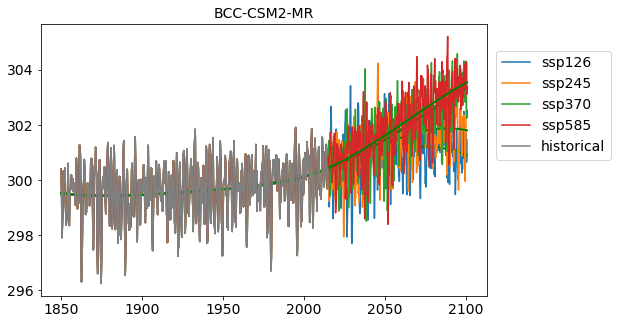

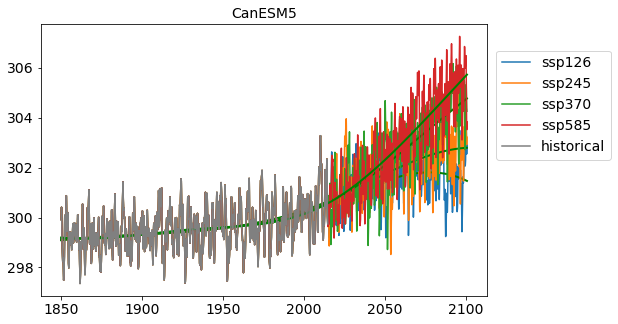

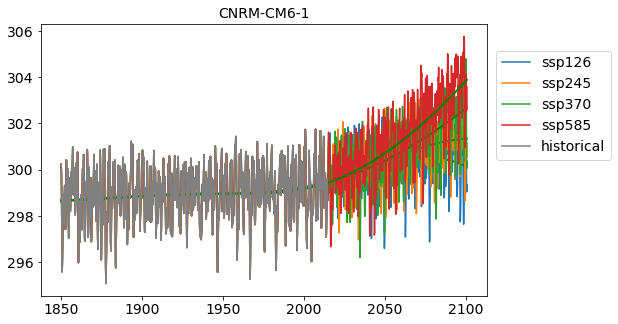

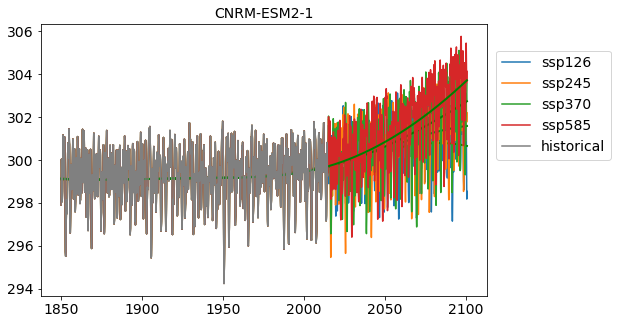

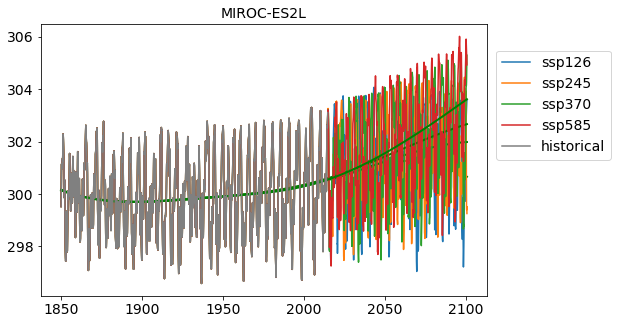

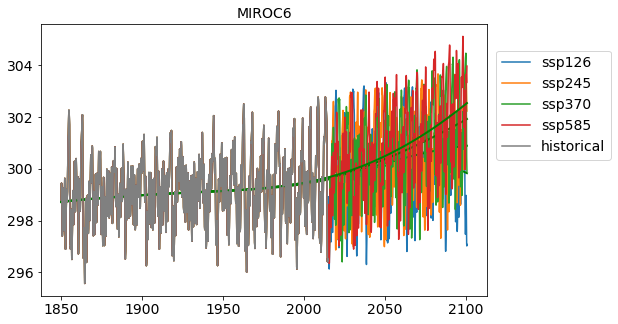

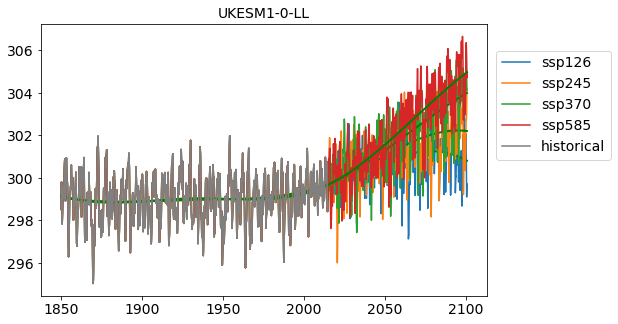

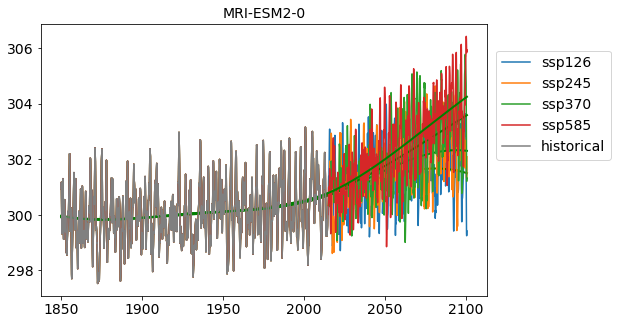

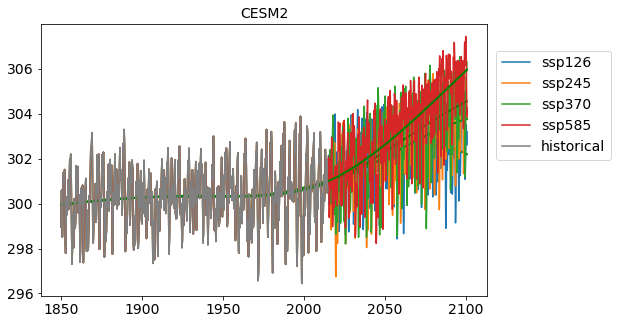

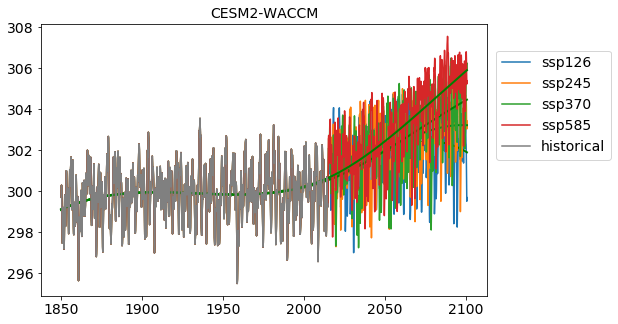

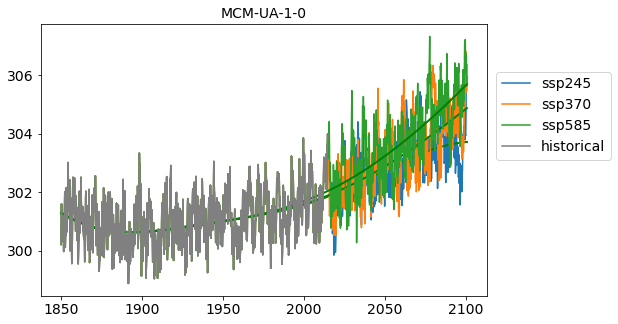

In [4]:
internal_knots = [1850 + (2014-1850)/2, 2014] # = historical midpoint (1932) and endpoint (2014)

hist_years = np.arange(1850 + 0.5/12 + 1/12, 2015-1/12, 1/12)
ssp_years = np.arange(2015+ 0.5/12, 2101-1/12, 1/12)
all_years = np.arange(1850 + 0.5/12 + 1/12, 2101-1/12, 1/12)
ssp_length = 86*12-1; # cut in year 2100. Some exp go beyond this year.

anomalies = {}

for model in models:
    anomalies[model] = {}
    fig, ax = plt.subplots(figsize = [8,5])

    hist_data = data_dict[model]['historical']
    hist_trends = {}

    # combine historical and ssp data, then smooth the combined time series
    # to minimize discontinuity of the trend between years 2014 - 2015
    for exp in data_dict[model].keys():
        
        if exp not in ['piControl', 'historical']:
            ssp_data = data_dict[model][exp][:ssp_length]
            # approximate missing end of historical by a mean
            exp_data = np.concatenate((hist_data, [np.mean([hist_data[-1], ssp_data[0]])], ssp_data))
            plt.plot(all_years, exp_data, label = exp) 
            spl = LSQUnivariateSpline(all_years, exp_data, internal_knots)
            ax.plot(all_years, spl(all_years), 'g', lw=2)
            
            # save ssp anomaly in dictionary
            anomalies[model][exp] = data_dict[model][exp][:ssp_length] - spl(ssp_years)
    
    ax.plot(hist_years, hist_data, color = 'gray', label = 'historical')
    ax.set_title(model, fontsize = 14)
    ax.tick_params(axis='both',labelsize=14)
    ax.legend(loc=(1.02,0.5), fontsize = 14);
    

## Define anomalies in piControl as deviation from a linear trend fit for all years available and subtract piControl climatology from all anomalies

In [5]:
control_clim = {}
for model in models:
    exp = 'piControl'
    control_data = data_dict[model][exp]
    p = np.polyfit(np.arange(len(control_data)), control_data, deg = 1)
    trend = np.polyval(p,np.arange(len(control_data)))
    anomalies[model][exp] = control_data - trend

    # then find piControl climatology:
    c_anom = np.concatenate(([np.nan],control_data - trend,[np.nan]))
    clim = np.zeros(12)
    for month in range(12):
        clim[month] = np.nanmean(c_anom[month::12])
    control_clim[model] = clim
    
    anomalies[model][exp] -= np.tile(clim,int(len(c_anom)/12))[1:-1]
    
    for exp in experiments[2:]:
        if exp in anomalies[model]:
            anomalies[model][exp] -= np.tile(clim,86)[:-1]
    

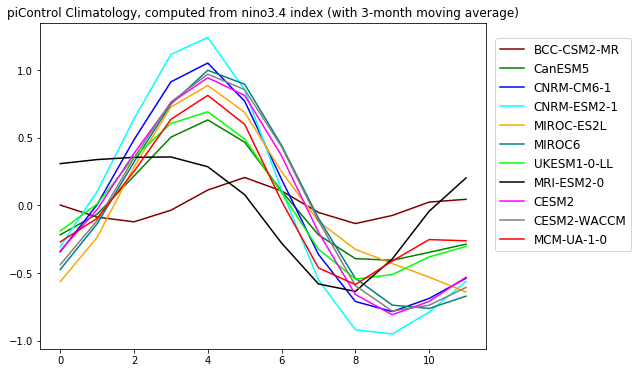

In [6]:
fig, ax = plt.subplots(figsize = [8,6])

colors = ['Maroon', 'Green', 'Blue', 'Cyan', 'Orange',  'Teal', 'Lime', 'Black', 'Magenta', 'Grey', 'Red']

for (i,model) in enumerate(models):
    ax.plot(control_clim[model], label = model, color = colors[i])
    
ax.legend(loc=(1.02,0.3), fontsize = 12)
ax.set_title('piControl Climatology, computed from nino3.4 index (with 3-month moving average)', fontsize = 12);

In [7]:
# convert to dataframe before saving:
df = None
for model in models:
    for exp in experiments:
        if exp in anomalies[model]:
            colname = [(model, exp)]
            df_col = pd.DataFrame(anomalies[model][exp], columns = colname)
            if df is None:
                df = df_col
            else:
                df = pd.merge(df, df_col, left_index=True, right_index=True, how='outer')
df.columns = pd.MultiIndex.from_tuples(df.columns, names=['Model', 'Experiment'])
#df.to_csv('../Processed_data/Nino3_4_monthly/detrended_deseasonalised_single_members.txt')
df

Model      BCC-CSM2-MR                                           CanESM5  \
Experiment   piControl    ssp126    ssp245    ssp370    ssp585 piControl   
0            -0.274695  0.559734  0.554233  0.399266  0.411986  0.951516   
1             0.092108  0.792134  0.786909  0.416502  0.476498  0.894688   
2             0.417530  0.859146  0.785561  0.371135  0.336926  0.902151   
3             0.704529  0.715388  0.677149  0.453138  0.267909  0.865105   
4             0.880683  0.456591  0.485367  0.629221  0.200070  0.670894   
...                ...       ...       ...       ...       ...       ...   
14393              NaN       NaN       NaN       NaN       NaN       NaN   
14394              NaN       NaN       NaN       NaN       NaN       NaN   
14395              NaN       NaN       NaN       NaN       NaN       NaN   
14396              NaN       NaN       NaN       NaN       NaN       NaN   
14397              NaN       NaN       NaN       NaN       NaN       NaN   

Model                                               ...     CESM2 CESM2-WACCM  \
Experiment    ssp126    ssp245    ssp370    ssp585  ...    ssp585   piControl   
0          -0.693346 -0.796988 -0.673559 -0.714865  ...  0.251293    0.254519   
1          -0.767201 -0.947160 -0.572399 -0.858984  ...  0.084732    0.421838   
2          -0.790552 -1.061348 -0.476925 -0.811935  ...  0.036040    0.698966   
3          -0.783438 -1.073696 -0.319334 -0.817433  ...  0.065721    1.019256   
4          -0.782224 -1.061981 -0.348179 -0.710542  ...  0.124161    1.344797   
...              ...       ...       ...       ...  ...       ...         ...   
14393            NaN       NaN       NaN       NaN  ...       NaN         NaN   
14394            NaN       NaN       NaN       NaN  ...       NaN         NaN   
14395            NaN       NaN       NaN       NaN  ...       NaN         NaN   
14396            NaN       NaN       NaN       NaN  ...       NaN         NaN   
14397            NaN       NaN       NaN       NaN  ...       NaN         NaN   

Model                                              MCM-UA-1-0            \
Experiment    ssp126    ssp245    ssp370    ssp585  piControl    ssp245   
0          -0.249166 -0.193694 -0.202217 -0.267643  -0.651448  1.717755   
1          -0.010794  0.107033  0.037901  0.132372  -0.660328  1.195248   
2           0.221907  0.514252  0.271238  0.512821  -0.661716  0.786149   
3           0.519607  0.773172  0.498358  0.839340  -0.663547  0.751735   
4           0.796709  1.005895  0.583532  0.998802  -0.705352  0.935811   
...              ...       ...       ...       ...        ...       ...   
14393            NaN       NaN       NaN       NaN        NaN       NaN   
14394            NaN       NaN       NaN       NaN        NaN       NaN   
14395            NaN       NaN       NaN       NaN        NaN       NaN   
14396            NaN       NaN       NaN       NaN        NaN       NaN   
14397            NaN       NaN       NaN       NaN        NaN       NaN   

Model                           
Experiment    ssp370    ssp585  
0           1.722895  1.556504  
1           1.094185  1.209621  
2           0.493311  0.920747  
3           0.253800  0.938345  
4           0.342742  1.113060  
...              ...       ...  
14393            NaN       NaN  
14394            NaN       NaN  
14395            NaN       NaN  
14396            NaN       NaN  
14397            NaN       NaN  

[14398 rows x 54 columns]

In [8]:
14398/12

1199.8333333333333

## Study anomalies:

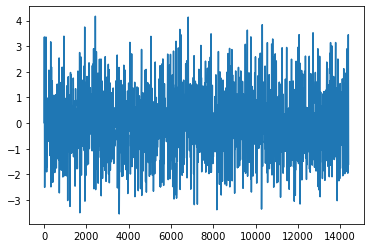

In [9]:
plt.plot(anomalies['CESM2']['piControl']);

# Compute variance for each model and experiment:

### Put results in a Figure similar to Figure 1, and include subplot of temperature gradients

In [10]:
def segments_monthly(data, years_used = 500*12, seg_length = 86*12, seg_overlap = 40*12):
    x = data[:years_used]
    starttimes = np.arange(0,len(x)-seg_length+1,seg_length - seg_overlap)
    segment_list = np.full((len(starttimes), seg_length), np.nan)
    
    for (i,k) in enumerate(starttimes):
        segment = x[int(k):int(k)+seg_length]; 
        segment_list[i] = segment
        
    segment_means = np.array([segment_list[i,:].mean() for i in range(len(starttimes))])
    segment_variances = np.array([segment_list[i,:].var() for i in range(len(starttimes))])
        
    return segment_means, segment_variances

def segment_trends_monthly(data, years_used = 500*12, seg_length = 86*12, seg_overlap = 40*12):
    x = data[:years_used]; t = np.arange(len(x))
    # subtract linear trend over all 500 years:
    x = x - np.polyval(np.polyfit(t,x,1),t)
    starttimes = np.arange(0,len(x)-seg_length+1,seg_length - seg_overlap)
    change_list = np.full(len(starttimes), np.nan)

    for (i,k) in enumerate(starttimes):
        segment = x[int(k):int(k)+seg_length]; t = np.arange(len(segment))
        trendpar = np.polyfit(t,segment,1)
        fit = np.polyval(trendpar,t)
        change_list[i] = fit[-1] - fit[0]
    #print(change_list)
    return [np.min(change_list), np.max(change_list)]



In [11]:
#import numpy as np
#import matplotlib.pyplot as plt
#import pandas as pd

datapath1 = '../Processed_data/Nino3_monthly/'
datapath2 = '../Processed_data/WP_monthly/'
experiments = ['piControl', 'historical', 'ssp126', 'ssp245', 'ssp370', 'ssp585']
models = ['BCC-CSM2-MR', 'CanESM5', 'CNRM-CM6-1', 'CNRM-ESM2-1', 'MIROC-ES2L', 
          'MIROC6', 'UKESM1-0-LL', 'MRI-ESM2-0',  'CESM2', 'CESM2-WACCM', 'MCM-UA-1-0']

# create dictionary of data for each model, containing only the member we want to use:
data_dict1 = {}; data_dict2 = {};
for model in models:
    data_dict1[model] = {}; data_dict2[model] = {};
    
    file1 = datapath1 + model + '_nino3_monthlyindex.txt'
    file2 = datapath2 + model + '_wp_monthlyindex.txt'
    data_table1 = pd.read_csv(file1, index_col=0, header=[0,1], keep_default_na = False)
    data_table2 = pd.read_csv(file2, index_col=0, header=[0,1], keep_default_na = False)
    if model in ['BCC-CSM2-MR', 'CanESM5', 'MIROC6', 'MRI-ESM2-0', 'CESM2-WACCM']:
        for exp in experiments:
            member = 'r1i1p1f1'
            data_list1 = data_table1[exp][member].values;
            data_dict1[model][exp] = np.array([np.float(i) for i in data_list1 if i])
            data_list2 = data_table2[exp][member].values;
            data_dict2[model][exp] = np.array([np.float(i) for i in data_list2 if i])
    elif model in ['MIROC-ES2L', 'CNRM-CM6-1','MCM-UA-1-0', 'UKESM1-0-LL']:
        for exp in experiments:
            if exp == 'piControl' and model == 'MCM-UA-1-0':
                member = 'r1i1p1f1'
            else:
                member = 'r1i1p1f2' # I have checked that historical f2 branches from piControl f1 in MCM-UA-1-0.
            if exp in data_table1: # additional if-test here, since 'MCM-UA-1-0' is missing the 'ssp126' experiment
                data_list1 = data_table1[exp][member].values
                data_dict1[model][exp] = np.array([np.float(i) for i in data_list1 if i]) 
                data_list2 = data_table2[exp][member].values
                data_dict2[model][exp] = np.array([np.float(i) for i in data_list2 if i])   
    elif model in ['CNRM-ESM2-1']:
        for exp in experiments:
            if exp == 'piControl':
                member = 'r1i1p1f2'
            else: 
                member = 'r2i1p1f2' # I have checked that historical r2 branches from piControl r1.
            data_list1 = data_table1[exp][member].values
            data_dict1[model][exp] = np.array([np.float(i) for i in data_list1 if i])  
            data_list2 = data_table2[exp][member].values
            data_dict2[model][exp] = np.array([np.float(i) for i in data_list2 if i])
    elif model in ['CESM2']:
        for exp in experiments:
            if exp == 'piControl':
                member = 'r1i1p1f1'
            else: 
                member = 'r4i1p1f1' # I have checked that historical r4 branches from piControl r1.
            data_list1 = data_table1[exp][member].values
            data_dict1[model][exp] = np.array([np.float(i) for i in data_list1 if i])  
            data_list2 = data_table2[exp][member].values
            data_dict2[model][exp] = np.array([np.float(i) for i in data_list2 if i])
            
ssp_length = 86*12-1; # cut in year 2100. Some exp go beyond this year.

gradients = {}
for model in models:
    gradients[model] = {};
    for exp in data_dict1[model]:
        data1 = data_dict1[model][exp]; data2 = data_dict2[model][exp]
        gradient = data2 - data1
        if exp in ['ssp126', 'ssp245', 'ssp370', 'ssp585']:
            gradients[model][exp] = gradient[:ssp_length] # west - east
        else:
            gradients[model][exp] = gradient

In [12]:
# define x-coordiates and colors for each experiment
x = {}
colors = ['black', 'blue', 'purple', 'red', 'green', 'cyan']
color_dict = {}
delta_x = 0.15
for ind,exp in enumerate(['piControl', 'ssp126', 'ssp245', 'ssp370', 'ssp585']):
    x[exp] = np.arange(len(models)) + 1 + delta_x*ind
    color_dict[exp] = colors[ind]

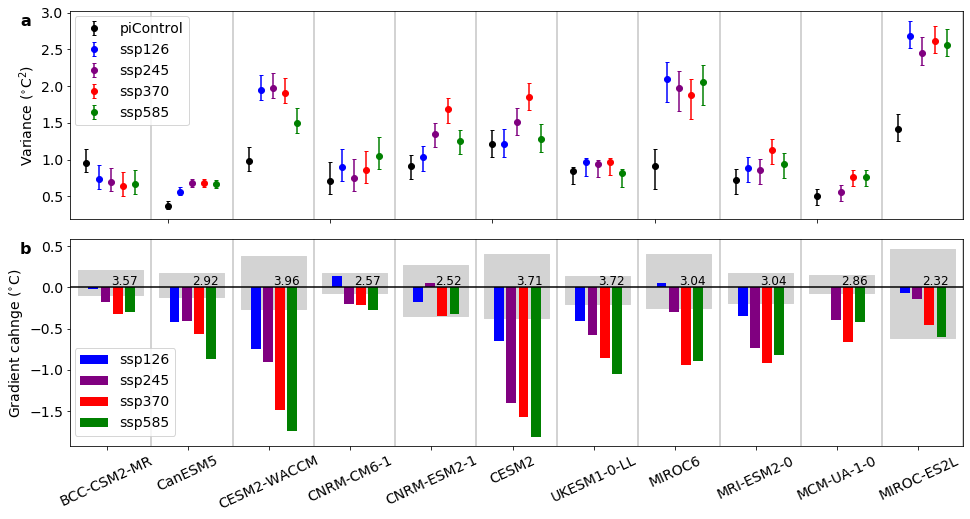

In [13]:
# create figure for variances and gradient changes:
fig, ax = plt.subplots(nrows = 2, figsize = [16,8])

models= ['BCC-CSM2-MR', 'CanESM5', 'CESM2-WACCM', 'CNRM-CM6-1', 'CNRM-ESM2-1', 'CESM2', 
          'UKESM1-0-LL', 'MIROC6', 'MRI-ESM2-0', 'MCM-UA-1-0', 'MIROC-ES2L']

piControl_std = pd.DataFrame(np.full(len(models),0), index = models, columns = ['piControl std'])
change = {};

for (k,model) in enumerate(models):
    change[model] = {};
    # split into segments and compute their mean and variance:
    control_data = anomalies[model]['piControl']
    means, variances = segments_monthly(control_data)
    # all error bars are calculated from piControl segments as:
    var_lerror = control_data.var() - variances.min()
    var_uerror = variances.max() - control_data.var()
    
    for exp in ['piControl', 'ssp126', 'ssp245', 'ssp370', 'ssp585']:
        if exp in anomalies[model]:
            anom = anomalies[model][exp]
            if k == 1:
                #ax.scatter(x[exp][k], anom.var(),  marker = 'o', color=color_dict[exp], label = exp)
                ax[0].errorbar(x[exp][k], anom.var(), yerr = [[var_lerror], [var_uerror]], fmt='o', marker = 'o', color=color_dict[exp], label = exp,  capsize=2)
            else:
                #ax.scatter(x[exp][k], anom.var(),  marker = 'o', color=color_dict[exp])
                ax[0].errorbar(x[exp][k], anom.var(), yerr = [[var_lerror], [var_uerror]], fmt='o', marker = 'o', color=color_dict[exp], capsize=2)
            if exp == 'piControl': # then save std in dataframe
                piControl_std.loc[model] = anom.std()
                
            ax[0].axvline(x['piControl'][k]+0.8, color='lightgray')
            ax[1].axvline(x['piControl'][k]+0.8, color='lightgray')
            
            
            y = gradients[model][exp];
            if exp == 'piControl':
                #print(np.mean(y))
                change[model][exp] = segment_trends_monthly(y)
                ax[1].text(x['piControl'][k] + 0.3, 0.03, np.round(np.mean(y),2), fontsize = 12)
                ax[1].fill_between([x['piControl'][k]-0.1, x['piControl'][k] + 0.7], change[model][exp][0], change[model][exp][1], color = "lightgray")
            else:
                # fit linear trend
                t = np.arange(0,len(y))
                p = np.polyfit(t,y,1)
                fit = np.polyval(p,t)
                change[model][exp] = fit[-1] - fit[0]
                if k == 0:
                    # then define labels for experiments
                    ax[1].bar(x[exp][k]-0.065, change[model][exp], width = 0.12, color=color_dict[exp], label = exp)
                else: 
                    ax[1].bar(x[exp][k]-0.065, change[model][exp], width = 0.12, color=color_dict[exp])

for axis in ax:
    axis.tick_params(axis='both',labelsize=14)
    axis.set_xlim(0.8, 11.8)
    axis.set_xticklabels([])
    
ax[1].plot([0.8, 11.8], [0, 0], color = "black")    
ax[0].set_ylabel('Variance ($^{\circ}$C$^2$)', fontsize = 14)   
ax[1].set_ylabel('Gradient cahnge ($^{\circ}$C)', fontsize = 14)  
plt.subplots_adjust(hspace=0.1)
ax[0].legend(loc=(0.005,0.45), fontsize = 14);
ax[1].legend(loc=(0.005,0.05), fontsize = 14);
 
plt.xticks(x['piControl']+0.25, models, rotation=25);
plt.text(-0.05, 0.95, 'a', fontweight = 'bold', fontsize = 16, horizontalalignment='center', verticalalignment='center', transform=ax[0].transAxes);
plt.text(-0.05, 0.95, 'b', fontweight = 'bold', fontsize = 16, horizontalalignment='center', verticalalignment='center', transform=ax[1].transAxes);


#plt.savefig('../Figures/newFigure1.png', format='png', dpi=300, bbox_inches="tight")


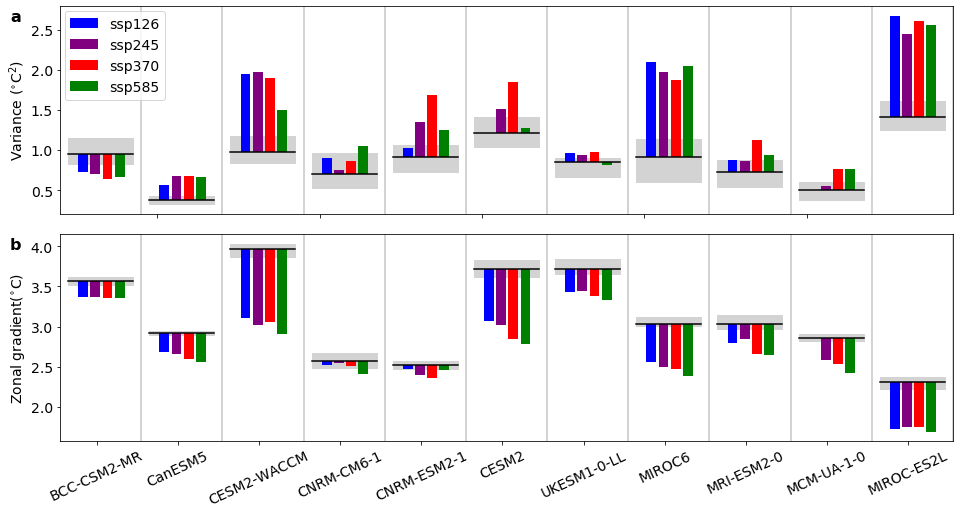

In [14]:
# create figure for variances and gradient changes:
fig, ax = plt.subplots(nrows = 2, figsize = [16,8])

models= ['BCC-CSM2-MR', 'CanESM5', 'CESM2-WACCM', 'CNRM-CM6-1', 'CNRM-ESM2-1', 'CESM2', 
          'UKESM1-0-LL', 'MIROC6', 'MRI-ESM2-0', 'MCM-UA-1-0', 'MIROC-ES2L']

piControl_std = pd.DataFrame(np.full(len(models),0), index = models, columns = ['piControl std'])
change = {};

for (k,model) in enumerate(models):
    change[model] = {};
    # split into segments and compute their mean and variance:
    control_data = anomalies[model]['piControl']
    means, variances = segments_monthly(control_data)
    # all error bars are calculated from piControl segments as:
    var_lerror = variances.min()
    var_uerror = variances.max()
    
    for exp in ['piControl', 'ssp126', 'ssp245', 'ssp370', 'ssp585']:
        if exp in anomalies[model]:
            anom = anomalies[model][exp]
            if exp == 'piControl':
                control_var = anom.var()
                ax[0].plot(x['piControl'][k] + [-0.1, 0.7], [control_var, control_var], color = "black")
                ax[0].fill_between([x['piControl'][k]-0.1, x['piControl'][k] + 0.7], variances.min(), variances.max(), color = "lightgray")
            else:
                if k == 1:
                    ax[0].bar(x[exp][k] - 0.065, anom.var() - control_var, bottom = control_var, width = 0.12, color=color_dict[exp], label = exp)
                else:
                    ax[0].bar(x[exp][k] - 0.065, anom.var() - control_var, bottom = control_var, width = 0.12, color=color_dict[exp])
            if exp == 'piControl': # then save std in dataframe
                piControl_std.loc[model] = anom.std()
                
            ax[0].axvline(x['piControl'][k]+0.8, color='lightgray')
            ax[1].axvline(x['piControl'][k]+0.8, color='lightgray')
            
            
            y = gradients[model][exp];
            if exp == 'piControl':
                control_mean = np.mean(y)
                means, variances = segments_monthly(y)
                #change[model][exp] = segment_trends_monthly(y)
                ax[1].plot(x['piControl'][k] + [-0.1, 0.7], [np.mean(y), np.mean(y)], color = "black")
                ax[1].fill_between([x['piControl'][k]-0.1, x['piControl'][k] + 0.7], means.min(), means.max(), color = "lightgray")
            else:
                # fit linear trend
                t = np.arange(0,len(y))
                p = np.polyfit(t,y,1)
                fit = np.polyval(p,t)
                change[model][exp] = fit[-1] - fit[0]
                if k == 0:
                    # then define labels for experiments
                    ax[1].bar(x[exp][k] - 0.065, np.mean(y) - control_mean, bottom = control_mean, width = 0.12, color=color_dict[exp], label = exp)
                    #ax[1].bar(x[exp][k]-0.065, change[model][exp], width = 0.12, color=color_dict[exp], label = exp)
                else: 
                    ax[1].bar(x[exp][k] - 0.065, np.mean(y) - control_mean, bottom = control_mean, width = 0.12, color=color_dict[exp])
                    #ax[1].bar(x[exp][k]-0.065, change[model][exp], width = 0.12, color=color_dict[exp])

for axis in ax:
    axis.tick_params(axis='both',labelsize=14)
    axis.set_xlim(0.8, 11.8)
    axis.set_xticklabels([])
    
#ax[1].plot([0.8, 11.8], [0, 0], color = "black")    
ax[0].set_ylabel('Variance ($^{\circ}$C$^2$)', fontsize = 14)   
ax[1].set_ylabel('Zonal gradient($^{\circ}$C)', fontsize = 14)  
plt.subplots_adjust(hspace=0.1)
ax[0].legend(loc=(0.005,0.55), fontsize = 14);
#ax[1].legend(loc=(0.005,0.05), fontsize = 14);
 
plt.xticks(x['piControl']+0.25, models, rotation=25);
plt.text(-0.05, 0.95, 'a', fontweight = 'bold', fontsize = 16, horizontalalignment='center', verticalalignment='center', transform=ax[0].transAxes);
plt.text(-0.05, 0.95, 'b', fontweight = 'bold', fontsize = 16, horizontalalignment='center', verticalalignment='center', transform=ax[1].transAxes);


#plt.savefig('../Figures/Figure2.png', format='png', dpi=300, bbox_inches="tight")


In [ ]:
# create figure for variances, gradient changes, and scatter plot:

import matplotlib.gridspec as gridspec
import seaborn as sns
import xarray as xr
from scipy.stats import pearsonr

#fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = [16,8])
#fig = plt.figure(figsize = [20,8]); widths = [16, 4]
fig = plt.figure(figsize = [16,13.9]); widths = [8, 8]
#gs = fig.add_gridspec(3, 2, width_ratios=widths)

#make outer gridspec
outer = gridspec.GridSpec(2, 1, height_ratios = [2, 1], hspace = 0.2) 
#make nested gridspecs
gs1 = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec = outer[0], hspace = 0.1)
gs2 = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec = outer[1], wspace = 0.1)

ax_a = fig.add_subplot(gs1[0])
ax_b = fig.add_subplot(gs1[1])
ax_c = fig.add_subplot(gs2[0])
ax_d = fig.add_subplot(gs2[1])

ax1 = [ax_a, ax_b]
ax = [ax_a, ax_b, ax_c, ax_d]

models = ['BCC-CSM2-MR', 'CanESM5', 'CESM2-WACCM', 'CNRM-CM6-1', 'CNRM-ESM2-1', 'CESM2', 
          'UKESM1-0-LL', 'MIROC6', 'MRI-ESM2-0', 'MCM-UA-1-0', 'MIROC-ES2L']
cols = sns.color_palette("Paired", 11)
cols[5] = (0.70,0,0); cols[-1] = (0.95, 0.95, 0.45)

# load previously saved netcdf files
all_eofs = xr.open_dataset('../Processed_data/eof_data/piControl_2eofs.nc')
all_pcs = xr.open_dataset('../Processed_data/eof_data/piControl_2pcs.nc')
all_pseudo_pcs = xr.open_dataset('../Processed_data/eof_data/ssp_pseudo_pcs.nc')

def eof_sign(array):
    testpoint = array.sel(lat = 0.5, lon = 175.5)
    if testpoint < 0:
        sign = -1
    else:
        sign = 1
    return sign

piControl_std = pd.DataFrame(np.full(len(models),0), index = models, columns = ['piControl std'])
change = {};
var_changes = []
grad_changes = []
evar_changes= []

for (k,model) in enumerate(models):
    change[model] = {};
    # split into segments and compute their mean and variance:
    control_data = anomalies[model]['piControl']
    means, variances = segments_monthly(control_data)
    # all error bars are calculated from piControl segments as:
    var_lerror = variances.min()
    var_uerror = variances.max()
    
    var = model + '_eofs';
    eof1 = all_eofs[var].sel(mode=0)
    eof2 = all_eofs[var].sel(mode=1)

    var2 = model + '_pcs'
    pc1 = all_pcs[var2].sel(mode=0)
    pc2 = all_pcs[var2].sel(mode=1)
    
    # make consistent signs:
    sign1 = eof_sign(eof1); sign2 = eof_sign(eof2)
    eof1 *= sign1; eof2 *= sign2
    pc1 *= sign1; pc2 *= sign2
    
    n_pc1 = pc1/pc1.std(); n_pc2 = pc2/pc2.std()
    eindex = (n_pc1 - n_pc2)/np.sqrt(2); 
    picontrol_var = np.var(eindex)
    
    for exp in ['piControl', 'ssp126', 'ssp245', 'ssp370', 'ssp585']:
        if exp in anomalies[model]:
            anom = anomalies[model][exp]
            if exp == 'piControl':
                control_var = anom.var()
                ax_a.plot(x['piControl'][k] + [-0.1, 0.7], [control_var, control_var], color = "black")
                ax_a.fill_between([x['piControl'][k]-0.1, x['piControl'][k] + 0.7], variances.min(), variances.max(), color = "lightgray")
            else:
                if k == 1:
                    ax_a.bar(x[exp][k] - 0.065, anom.var() - control_var, bottom = control_var, width = 0.12, color=color_dict[exp], label = exp)
                else:
                    ax_a.bar(x[exp][k] - 0.065, anom.var() - control_var, bottom = control_var, width = 0.12, color=color_dict[exp])
            if exp == 'piControl': # then save std in dataframe
                piControl_std.loc[model] = anom.std()
                
            ax_a.axvline(x['piControl'][k]+0.8, color='lightgray')
            ax_b.axvline(x['piControl'][k]+0.8, color='lightgray')
            
            
            y = gradients[model][exp];
            if exp == 'piControl':
                control_mean = np.mean(y)
                means, variances = segments_monthly(y)
                #change[model][exp] = segment_trends_monthly(y)
                ax_b.plot(x['piControl'][k] + [-0.1, 0.7], [np.mean(y), np.mean(y)], color = "black")
                ax_b.fill_between([x['piControl'][k]-0.1, x['piControl'][k] + 0.7], means.min(), means.max(), color = "lightgray")
            else:
                # fit linear trend
                t = np.arange(0,len(y))
                p = np.polyfit(t,y,1)
                fit = np.polyval(p,t)
                change[model][exp] = fit[-1] - fit[0]
                if k == 0:
                    # then define labels for experiments
                    ax_b.bar(x[exp][k] - 0.065, np.mean(y) - control_mean, bottom = control_mean, width = 0.12, color=color_dict[exp], label = exp)
                    #ax[1].bar(x[exp][k]-0.065, change[model][exp], width = 0.12, color=color_dict[exp], label = exp)
                else: 
                    ax_b.bar(x[exp][k] - 0.065, np.mean(y) - control_mean, bottom = control_mean, width = 0.12, color=color_dict[exp])
                    #ax[1].bar(x[exp][k]-0.065, change[model][exp], width = 0.12, color=color_dict[exp])

            # scatter plots:
            if exp != 'piControl':
                var_change = anom.var() - control_var; grad_change = np.mean(y) - control_mean
                var_changes = np.append(var_changes, var_change)
                grad_changes = np.append(grad_changes, grad_change)
                ax_c.scatter(var_change, grad_change, c = [cols[k]])
                
                var = model + '_' + exp + '_pseudo_pcs'
                ppc1 = sign1*all_pseudo_pcs[var].sel(mode=0)
                ppc2 = sign2*all_pseudo_pcs[var].sel(mode=1)
                n_pc1 = ppc1/pc1.std(); n_pc2 = ppc2/pc2.std()
                eindex = (n_pc1 - n_pc2)/np.sqrt(2);
                
                # plot: np.var(eindex) - picontrol_var
                evar_change = np.var(eindex) - picontrol_var
                #print(model, exp, np.var(eindex))
                evar_changes = np.append(evar_changes, evar_change)
                ax_d.scatter(evar_change, grad_change, c = [cols[k]])
                            
                
for axis in ax1:
    axis.tick_params(axis='both',labelsize=14)
    axis.set_xlim(0.8, 11.8)
    axis.set_xticklabels([])
    
ax_c.axvline(0, color='black', lw=1); ax_c.axhline(0, color='black', lw=1);
ax_c.tick_params(axis='both',labelsize=14)
ax_c.set_ylabel('Change of zonal gradient ($^{\circ}$C)', fontsize = 14)
ax_c.set_xlabel('Change of Niño 3.4 variance ($^{\circ}$C$^2$)', fontsize = 14)
ax_c.set_aspect('equal')
ax_d.axvline(0, color='black', lw=1); ax_d.axhline(0, color='black', lw=1);
ax_d.tick_params(axis='both',labelsize=14)
ax_d.set_ylabel('Change of zonal gradient ($^{\circ}$C)', fontsize = 14)
ax_d.set_xlabel('Change of E-index variance', fontsize = 14)
ax_d.set_aspect('equal')

ax_b.set_ylim(1.6, 4.15)
ax_b.scatter(x['piControl']+0.25, np.full(11, 1.5), color = cols, clip_on=False)
    
#ax[1].plot([0.8, 11.8], [0, 0], color = "black")    
ax_a.set_ylabel('Variance ($^{\circ}$C$^2$)', fontsize = 14)   
ax_b.set_ylabel('Zonal gradient ($^{\circ}$C)', fontsize = 14)  
#plt.subplots_adjust(hspace=0.1, wspace = 0.15)
ax_a.legend(loc=(0.005,0.55), fontsize = 14);
#ax[1].legend(loc=(0.005,0.05), fontsize = 14);

plt.text(-0.05, 0.95, 'a', fontweight = 'bold', fontsize = 16, horizontalalignment='center', verticalalignment='center', transform=ax_a.transAxes);
plt.text(-0.05, 0.95, 'b', fontweight = 'bold', fontsize = 16, horizontalalignment='center', verticalalignment='center', transform=ax_b.transAxes);
plt.text(-0.22, 0.975, 'c', fontweight = 'bold', fontsize = 16, horizontalalignment='center', verticalalignment='center', transform=ax_c.transAxes);
plt.text(-0.22, 0.975, 'd', fontweight = 'bold', fontsize = 16, horizontalalignment='center', verticalalignment='center', transform=ax_d.transAxes);
#plt.text(-0.1, 0.975, 'c', fontweight = 'bold', fontsize = 16, horizontalalignment='center', verticalalignment='center', transform=ax_c.transAxes);
#plt.text(-0.1, 0.975, 'd', fontweight = 'bold', fontsize = 16, horizontalalignment='center', verticalalignment='center', transform=ax_d.transAxes);



#plt.text(0.8, 0.9, r'$\rho = $' + str(np.round(np.corrcoef(var_changes, grad_changes)[0,1],2)), fontsize = 16, horizontalalignment='center', verticalalignment='center', transform=ax_c.transAxes);
#plt.text(0.8, 0.9, r'$\rho = $' + str(np.round(np.corrcoef(evar_changes, grad_changes)[0,1],2)), fontsize = 16, horizontalalignment='center', verticalalignment='center', transform=ax_d.transAxes);
plt.text(0.8, 0.9, r'$\rho = $' + str(np.round(pearsonr(var_changes, grad_changes)[0],2)), fontsize = 16, horizontalalignment='center', verticalalignment='center', transform=ax_c.transAxes);
plt.text(0.8, 0.9, r'$\rho = $' + str(np.round(pearsonr(evar_changes, grad_changes)[0],2)), fontsize = 16, horizontalalignment='center', verticalalignment='center', transform=ax_d.transAxes);
print('p-values of correlations:', pearsonr(var_changes, grad_changes)[1], pearsonr(evar_changes, grad_changes)[1])

p1c = np.polyfit(var_changes, grad_changes, 1); p1d = np.polyfit(evar_changes, grad_changes, 1); 
ax_c.plot(var_changes, np.polyval(p1c, var_changes), color = "black", linewidth = 1);
ax_d.plot(evar_changes, np.polyval(p1d, evar_changes), color = "black", linewidth = 1); 

plt.sca(ax_b)
plt.xticks(x['piControl']+0.25, models, rotation=25);

#fig.align_ylabels([ax_a, ax_b, ax_c])
#plt.savefig('../Figures/Figure2.png', format='png', dpi=300, bbox_inches="tight")


p-values of correlations: 0.000152191048469785 1.970307861388326e-06


(-0.5460336433096021, 0.000152191048469785)

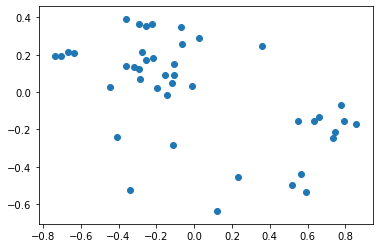

In [14]:
plt.scatter(var_changes-np.mean(var_changes), grad_changes - np.mean(grad_changes))
pearsonr(np.transpose(var_changes), np.transpose(grad_changes))

In [17]:
np.corrcoef(evar_changes-np.mean(evar_changes), grad_changes - np.mean(grad_changes))

array([[ 1.        , -0.65405685],
       [-0.65405685,  1.        ]])

In [19]:
np.corrcoef(evar_changes, grad_changes)

array([[ 1.        , -0.65405685],
       [-0.65405685,  1.        ]])

In [18]:
np.corrcoef(var_changes-np.mean(var_changes), grad_changes - np.mean(grad_changes))

array([[ 1.        , -0.54603364],
       [-0.54603364,  1.        ]])

In [21]:
pearsonr(np.transpose(evar_changes), np.transpose(grad_changes))

(-0.654056854060703, 1.970307861388326e-06)

In [18]:
var_changes

array([-2.27986550e-01, -2.59152280e-01, -3.24025999e-01, -2.93987151e-01,
        1.91562669e-01,  3.03512306e-01,  3.03570062e-01,  2.90876438e-01,
        9.75330979e-01,  9.99083424e-01,  9.27956439e-01,  5.27795637e-01,
        1.88121875e-01,  4.76087720e-02,  1.54761290e-01,  3.45200434e-01,
        1.17922971e-01,  4.35309836e-01,  7.69019150e-01,  3.39484743e-01,
        8.04470117e-04,  2.97991119e-01,  6.38530817e-01,  7.09506380e-02,
        1.16051009e-01,  9.27329710e-02,  1.21790648e-01, -3.42786820e-02,
        1.18636691e+00,  1.06717088e+00,  9.59010623e-01,  1.14327296e+00,
        1.54506343e-01,  1.32477631e-01,  3.96506546e-01,  2.13756997e-01,
        5.05539589e-02,  2.55275542e-01,  2.63132022e-01,  1.26757625e+00,
        1.04240475e+00,  1.20165121e+00,  1.15189385e+00])

In [23]:
grad_changes

array([-0.19926053, -0.19420926, -0.21476141, -0.21449786, -0.22957864,
       -0.26171306, -0.31908003, -0.36066415, -0.85006304, -0.94373984,
       -0.90779112, -1.04947667, -0.04629263, -0.01782141, -0.05846846,
       -0.15293428, -0.04541724, -0.12150554, -0.1655881 , -0.06360734,
       -0.64850514, -0.69441939, -0.86777824, -0.93516753, -0.28835987,
       -0.27608801, -0.33908942, -0.38396285, -0.47918418, -0.54394325,
       -0.5658361 , -0.65699896, -0.23700156, -0.19600126, -0.37852235,
       -0.38810879, -0.27055582, -0.31904293, -0.42756809, -0.58149832,
       -0.56582605, -0.56750335, -0.62354612])

In [27]:
evar_changes

array([-0.40411436, -0.40265766, -0.46001208, -0.42818447,  0.05254046,
        0.31201473,  0.08871522,  0.26709722,  1.06964931,  0.86151649,
        0.97371901,  0.58526776,  0.04283222,  0.03598173, -0.06670857,
        0.33113902, -0.02741416,  0.14226164,  0.17258263,  0.00476716,
        0.28654134,  0.485041  ,  0.82820122,  0.20410549,  0.07511237,
       -0.15753416, -0.01203979, -0.13578143,  1.06862925,  0.95438594,
        0.98158155,  0.89091152,  0.02174126,  0.35710877,  0.88629374,
        0.25762232,  0.18564028,  0.75917067,  0.91612428,  1.17496521,
        1.05357184,  0.98396401,  1.06178175])

In [41]:
pearsonr?

Signature: pearsonr(x, y)
Docstring:
Pearson correlation coefficient and p-value for testing non-correlation.

The Pearson correlation coefficient [1]_ measures the linear relationship
between two datasets.  The calculation of the p-value relies on the
assumption that each dataset is normally distributed.  (See Kowalski [3]_
for a discussion of the effects of non-normality of the input on the
distribution of the correlation coefficient.)  Like other correlation
coefficients, this one varies between -1 and +1 with 0 implying no
correlation. Correlations of -1 or +1 imply an exact linear relationship.
Positive correlations imply that as x increases, so does y. Negative
correlations imply that as x increases, y decreases.

The p-value roughly indicates the probability of an uncorrelated system
producing datasets that have a Pearson correlation at least as extreme
as the one computed from these datasets.

Parameters
----------
x : (N,) array_like
    Input
y : (N,) array_like
    Input

Re

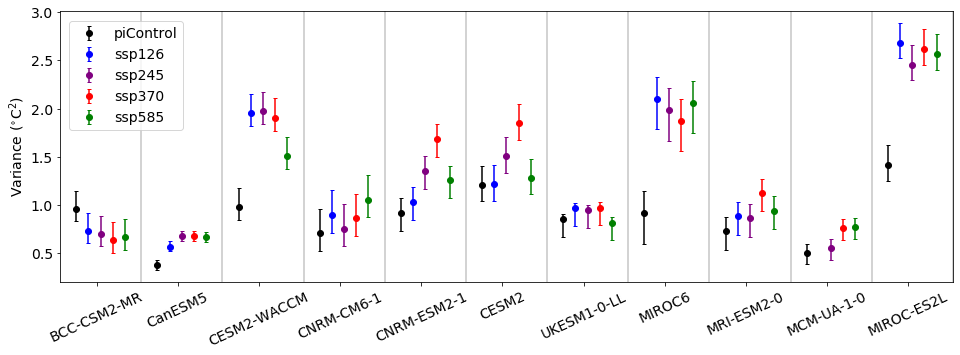

In [42]:
# create figure for variances only:
fig, ax = plt.subplots(figsize = [16,5])

models= ['BCC-CSM2-MR', 'CanESM5', 'CESM2-WACCM', 'CNRM-CM6-1', 'CNRM-ESM2-1', 'CESM2', 
          'UKESM1-0-LL', 'MIROC6', 'MRI-ESM2-0', 'MCM-UA-1-0', 'MIROC-ES2L']

piControl_std = pd.DataFrame(np.full(len(models),0), index = models, columns = ['piControl std'])
for (k,model) in enumerate(models):
    
    # split into segments and compute their mean and variance:
    control_data = anomalies[model]['piControl']
    means, variances = segments_monthly(control_data)
    # all error bars are calculated from piControl segments as:
    var_lerror = control_data.var() - variances.min()
    var_uerror = variances.max() - control_data.var()
    
    for exp in ['piControl', 'ssp126', 'ssp245', 'ssp370', 'ssp585']:
        if exp in anomalies[model]:
            anom = anomalies[model][exp]
            if k == 1:
                #ax.scatter(x[exp][k], anom.var(),  marker = 'o', color=color_dict[exp], label = exp)
                ax.errorbar(x[exp][k], anom.var(), yerr = [[var_lerror], [var_uerror]], fmt='o', marker = 'o', color=color_dict[exp], label = exp,  capsize=2)
            else:
                #ax.scatter(x[exp][k], anom.var(),  marker = 'o', color=color_dict[exp])
                ax.errorbar(x[exp][k], anom.var(), yerr = [[var_lerror], [var_uerror]], fmt='o', marker = 'o', color=color_dict[exp], capsize=2)
            if exp == 'piControl': # then save std in dataframe
                piControl_std.loc[model] = anom.std()
            ax.axvline(x['piControl'][k]+0.8, color='lightgray')
            
ax.tick_params(axis='both',labelsize=14)    
ax.set_ylabel('Variance ($^{\circ}$C$^2$)', fontsize = 14)
plt.xticks(x['piControl']+0.25, models, rotation=25);
ax.legend(loc=(0.01,0.56), fontsize = 14);
ax.set_xlim(0.8, 11.8);

#plt.savefig('../Figures/newFigure1.png', format='png', dpi=300, bbox_inches="tight")

# save dataframe of piControl standard deviations:
#piControl_std.to_csv('../Processed_data/piControl_std_monthly3monthsmoothed.txt')




In [42]:
piControl_std

,piControl std
BCC-CSM2-MR,0.979213
CanESM5,0.610872
CESM2-WACCM,0.988039
CNRM-CM6-1,0.841924
CNRM-ESM2-1,0.956524
CESM2,1.100942
UKESM1-0-LL,0.922258
MIROC6,0.955990
MRI-ESM2-0,0.853083
MCM-UA-1-0,0.709841


## Similar figure for the means

BCC-CSM2-MR 2.620953819235865
CanESM5 3.8355949872429846
CESM2-WACCM 3.3866214865223583
CNRM-CM6-1 2.459778462450288
CNRM-ESM2-1 2.339959524279209
CESM2 3.2116726525455306
UKESM1-0-LL 3.2759594542869195
MIROC6 2.025275346647277
MRI-ESM2-0 2.468965899362672
MCM-UA-1-0 2.8521946756090983
MIROC-ES2L 2.2760336320557144


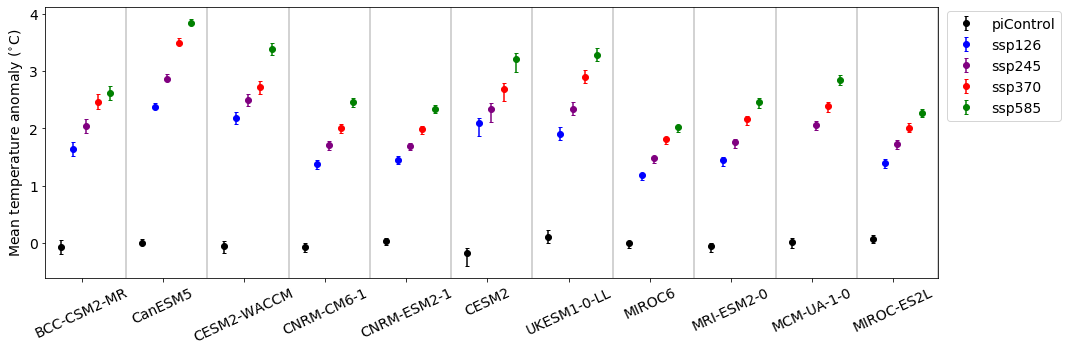

In [44]:
# create figure:
fig, ax = plt.subplots(figsize = [16,5])

models= ['BCC-CSM2-MR', 'CanESM5', 'CESM2-WACCM', 'CNRM-CM6-1', 'CNRM-ESM2-1', 'CESM2', 
          'UKESM1-0-LL', 'MIROC6', 'MRI-ESM2-0', 'MCM-UA-1-0', 'MIROC-ES2L']
for (k,model) in enumerate(models):
    # split into segments and compute their mean and variance:
    control_data = data_dict[model]['piControl']
    means, variances = segments_monthly(control_data)
    # all error bars are calculated from piControl segments as:
    mean_lerror = control_data.mean() - means.min()
    mean_uerror = means.max() - control_data.mean()
    
    for exp in ['piControl', 'ssp126', 'ssp245', 'ssp370', 'ssp585']:
        if exp in anomalies[model]:
            data = data_dict[model][exp][:ssp_length]
            anomaly =  data.mean() - control_data.mean();
            if k == 1:
                #ax.scatter(x[exp][k], anom.var(),  marker = 'o', color=color_dict[exp], label = exp)
                ax.errorbar(x[exp][k], anomaly, yerr = [[mean_lerror], [mean_uerror]], fmt='o', marker = 'o', color=color_dict[exp], label = exp,  capsize=2)
                if exp == 'ssp585':
                    print(model, anomaly)
            else:
                #ax.scatter(x[exp][k], anom.var(),  marker = 'o', color=color_dict[exp])
                ax.errorbar(x[exp][k], anomaly, yerr = [[mean_lerror], [mean_uerror]], fmt='o', marker = 'o', color=color_dict[exp], capsize=2)
                if exp == 'ssp585':
                    print(model, anomaly)
            ax.axvline(x['piControl'][k]+0.8, color='lightgray')
            
ax.tick_params(axis='both',labelsize=14)    
ax.set_ylabel('Mean temperature anomaly ($^{\circ}$C)', fontsize = 14)
plt.xticks(x['piControl']+0.25, models, rotation=25);
ax.legend(loc=(1.01,0.58), fontsize = 14);
ax.set_xlim(0.8, 11.8);

#plt.savefig('../Figures/supp_meananoms.png', format='png', dpi=300, bbox_inches="tight")



## Running windows of standard deviations in ssp

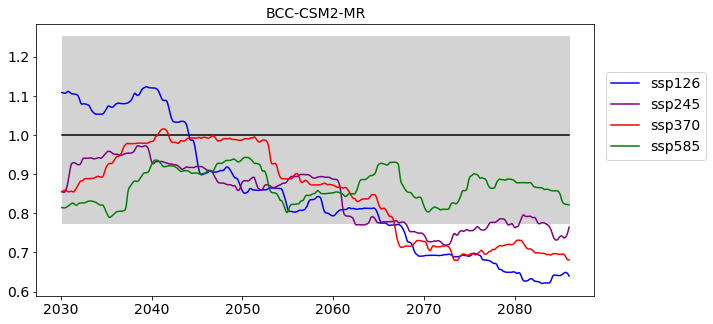

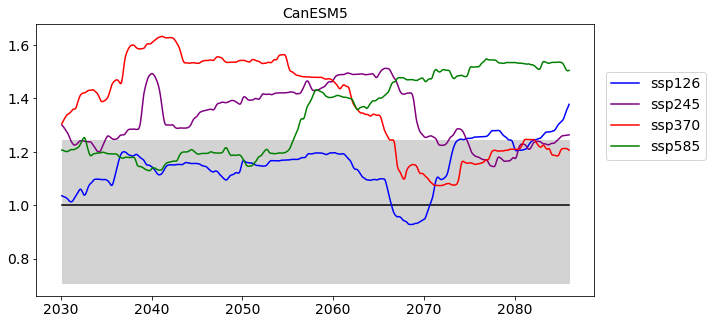

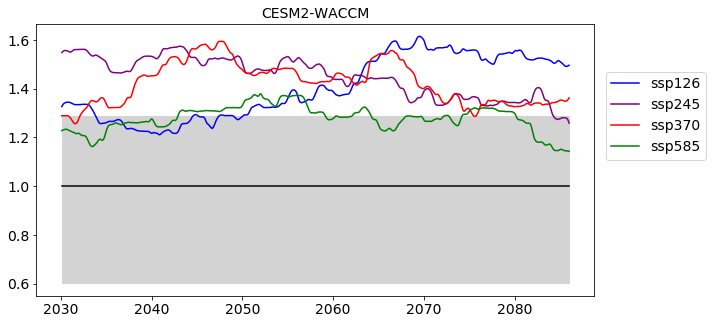

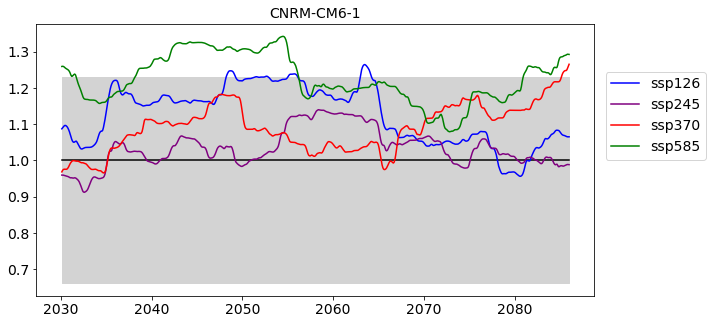

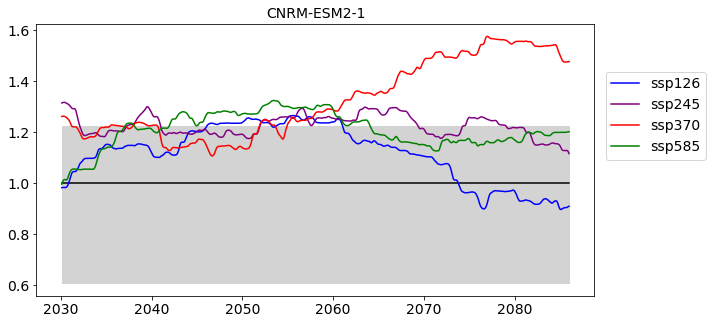

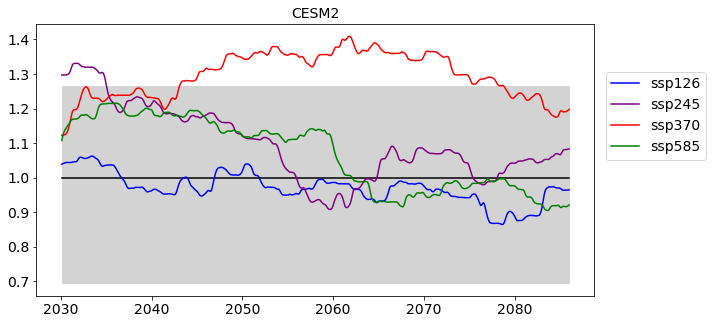

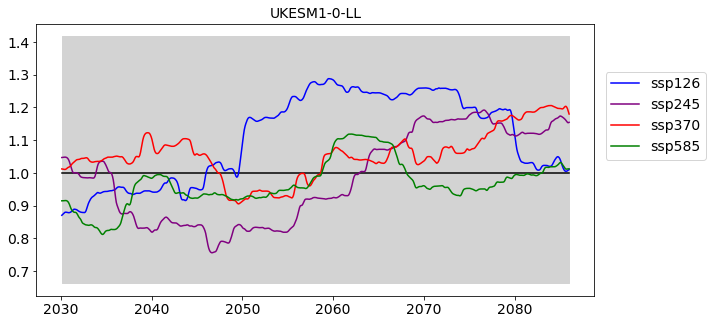

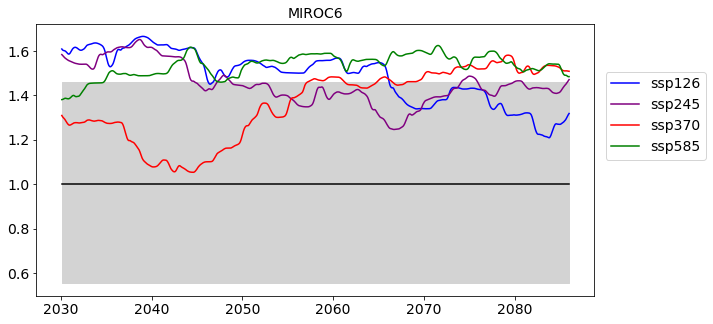

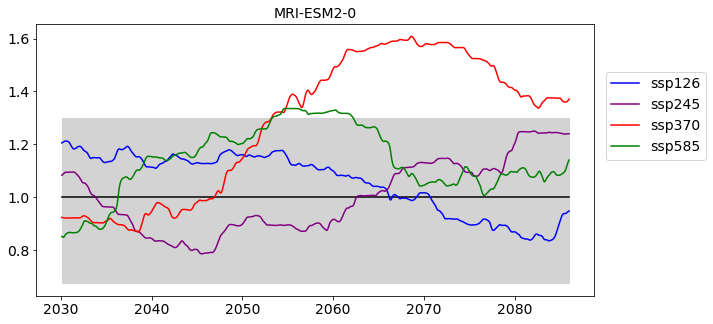

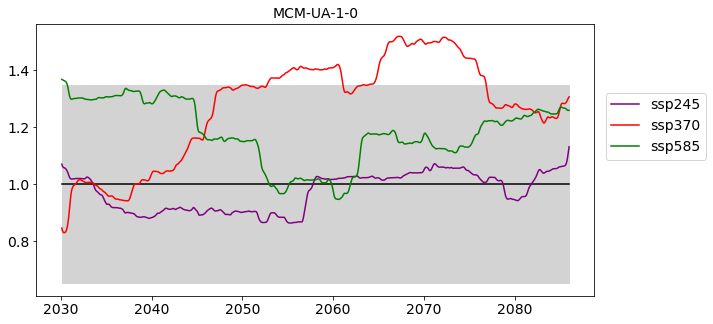

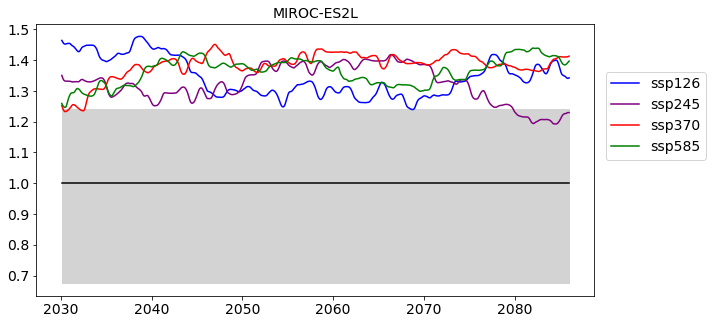

In [44]:
Yrs = 30

for (k,model) in enumerate(models):
    # create figure:
    fig, ax = plt.subplots(figsize = [10,5])
    
    time = np.arange(2030+1.5/12, 2086-0.5/12, 1/12)
    
    # uncertainty from piControl 30-yr segments:
    c_anom = anomalies[model]['piControl']
    c_std = piControl_std['piControl std'].loc[model]
    c_running_std = np.full(len(c_anom) - Yrs*12, np.nan)
    for t in range(len(c_running_std)):
        c_running_std[t] = np.std(c_anom[t:(t+Yrs*12)])
    ax.fill_between([time[0], time[-1]], c_running_std.min()/c_std, c_running_std.max()/c_std, color = "lightgray")
    ax.plot([time[0], time[-1]], [1, 1], color = "black")
    
    for exp in ['ssp126', 'ssp245', 'ssp370', 'ssp585']:
        if exp in anomalies[model]:
            anom = anomalies[model][exp]
            # 30 yr running mean std
            running_std = np.full(len(anom) - Yrs*12, np.nan)
            for t in range(len(running_std)):
                running_std[t] = np.std(anom[t:(t+Yrs*12)])
            
            ax.plot(time, running_std/c_std, color=color_dict[exp], label = exp)
            ax.set_title(model, fontsize=14)
            ax.legend(loc=(1.02,0.5), fontsize = 14);
            
            ax.tick_params(axis='both',labelsize=14)    


## Spectral analysis

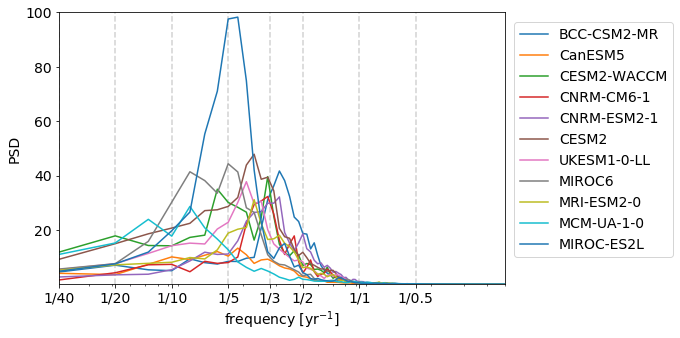

In [45]:
from scipy import signal

exp = 'piControl'

x_axis = 'frequency'
#x_axis = 'period'

fig, ax = plt.subplots(figsize = (8,5))

# plot vertical lines at given periods:
if x_axis == 'frequency':
    xcoords = [1/2, 1, 2, 3, 5, 10, 20, 40] # unit years
    for xc in xcoords:
        ax.axvline(x=1/(12*xc), color='lightgray', linestyle='--')
elif x_axis == 'period':
    #xcoords = [1/6,  1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20]
    xcoords = [1/6, 1/4, 1, 2, 3, 5, 10, 20, 40] # unit years
    for xc in xcoords:
        ax.axvline(x=(12*xc), color='lightgray', linestyle='--')
    
for model in models:
    x = anomalies[model][exp]
    f, Pxx_den = signal.welch(x, nperseg=40*12)
    if x_axis == 'frequency':
        #plt.loglog(f, Pxx_den, label = model)
        plt.semilogx(f, Pxx_den, label = model)
        plt.xticks(1/(12*np.array(xcoords)),['1/' +str(xcoords[i]) for i in range(len(xcoords))])
        plt.xlabel('frequency [yr$^{-1}$]', fontsize = 14)
        plt.xlim(1/(40*12), 1/2)
        plt.ylim(2*10**(-2), 10**2)
    elif x_axis == 'period':
        #plt.loglog(np.flip(1/f[1:]), np.flip(Pxx_den[1:]), label = model)
        plt.semilogx(np.flip(1/f[1:]), np.flip(Pxx_den[1:]), label = model)
        plt.xticks(12*np.array(xcoords), np.array(xcoords))
        plt.xlabel('Period [yrs]', fontsize = 14)
        plt.xlim(2, 12*40)
        plt.ylim(2*10**(-2), 10**2)

plt.ylabel('PSD', fontsize = 14)
ax.legend(loc=(1.02,0.1), fontsize = 14);
plt.tick_params(axis='both', labelsize = 14)

plt.show()


In [46]:
# function for plotting thick lins outside an interval:
def thick_lines(f, Pxx, min_vals, max_vals, ax, xaxis = 'period', lw = 4, lower_power = False, thick_color = "black"):
    # perform a linear interpolation to make points more dense
    f_intp = np.arange(min(f[1:]), max(f[1:]), np.diff(f)[0]/20)
    P_intp = np.interp(f_intp, f[1:], Pxx[1:])
    max_vals_intp = np.interp(f_intp, f[1:], max_vals); min_vals_intp = np.interp(f_intp, f[1:], min_vals);
    # find out where plot is outside shaded interval
    i=0;
    while i < len(f_intp):
        if P_intp[i] > max_vals_intp[i]:
            first_i = i
            # find first index not satisfying this criterion:
            while P_intp[i] > max_vals_intp[i] and i < len(f_intp)-1:
                i += 1;
            # plot thick line
            if xaxis == 'period':
                ax.semilogx(np.flip(1/f_intp[first_i:i]), np.flip(P_intp[first_i:i]), color = thick_color, linewidth = lw)
            elif xaxis == 'frequency':
                ax.semilogx(f_intp[first_i:i], P_intp[first_i:i], color = thick_color, linewidth = lw)
        elif P_intp[i] < min_vals_intp[i] and lower_power == True:
            first_i = i
            # find first index not satisfying this criterion:
            while P_intp[i] < min_vals_intp[i] and i < len(f_intp)-1:
                i += 1;
            # plot thick line
            if xaxis == 'period':
                ax.semilogx(np.flip(1/f_intp[first_i:i]), np.flip(P_intp[first_i:i]), linewidth = lw, color = 'gray')
            elif xaxis == 'frequency':
                ax.semilogx(f_intp[first_i:i], P_intp[first_i:i], linewidth = lw, color = 'gray')
        i += 1



CNRM-CM6-1
ssp126
ssp245
ssp370
ssp585


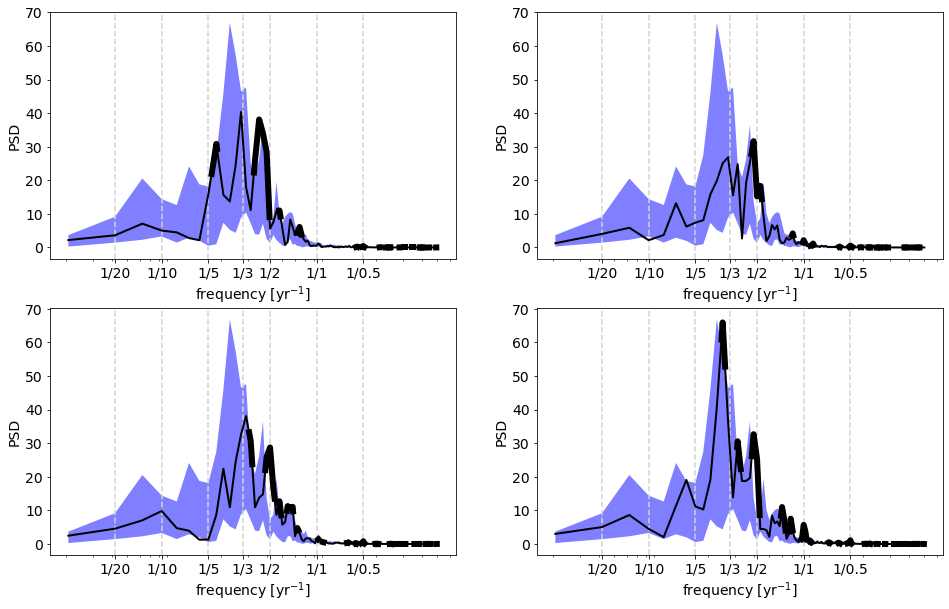

In [47]:
model = models[3]
print(model)

fig, axes = plt.subplots(ncols = 2, nrows = 2, figsize = (8*2,5*2))
axes = np.concatenate(axes)
seg_length = 86*12; nperseg = 40*12
overlap = seg_length - 30*12; 

# plot vertical lines at given periods:
#xcoords = [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20]
xcoords = [0.5, 1, 2, 3, 5, 10, 20]
for ax in axes:
    for xc in xcoords:
        #ax.axvline(x=12*xc, color='lightgray', linestyle='--')
        ax.axvline(x=1/(12*xc), color='lightgray', linestyle='--')

exp = 'piControl'
x = anomalies[model][exp][:500*12]
starttimes = np.arange(0,len(x)-seg_length+1,seg_length - overlap)
segment_list = np.full((len(starttimes), seg_length), np.nan)
Pxx_list = np.full((len(starttimes), int(nperseg/2)), np.nan)
for (i,k) in enumerate(starttimes):
    segment = x[k:k+seg_length]; segment_list[i] = segment
    f, Pxx = signal.welch(segment, nperseg=nperseg); Pxx_list[i] = Pxx[1:]
    
# find min and max values obtained at each frequency:
min_vals = np.zeros(int(nperseg/2)); max_vals = np.zeros(int(nperseg/2));
for (i,fi) in enumerate(f[1:]):
    Pxx_i = Pxx_list[:,i]
    min_vals[i] = Pxx_i.min()
    max_vals[i] = Pxx_i.max()
    

for ax in axes:
    #ax.fill_between(np.flip(1/f[1:]), np.flip(min_vals), np.flip(max_vals), facecolor='blue', alpha=0.5)   
    ax.fill_between(f[1:], min_vals, max_vals, facecolor='blue', alpha=0.5)       

for (k, exp) in enumerate(experiments[2:]):
    print(exp)
    #exp = 'ssp370'
    #ax = np.concatenate(axes)[i]
    ax = axes[k]
    x = anomalies[model][exp]
    f, Pxx = signal.welch(x, nperseg=nperseg);
    ax.semilogx(f[1:], Pxx[1:], color = "black", linewidth = 2)
    #ax.semilogx(np.flip(1/f[1:]), np.flip(Pxx[1:]), color = "black", linewidth = 2)
    thick_lines(f, Pxx, min_vals, max_vals, ax, lw = 6, xaxis = 'frequency')
    ax.set_xlabel('frequency [yr$^{-1}$]', fontsize = 14)
    #ax.set_xlabel('Period [yrs]', fontsize = 14)
    ax.set_ylabel('PSD', fontsize = 14)
    ax.tick_params(axis='both', labelsize = 14)

plt.setp(axes, xticks=1/(12*np.array(xcoords)), xticklabels=['1/' +str(xcoords[i]) for i in range(len(xcoords))])
#plt.xticks(12*np.array(xcoords),np.array(xcoords))

plt.show()



## Loop through all models

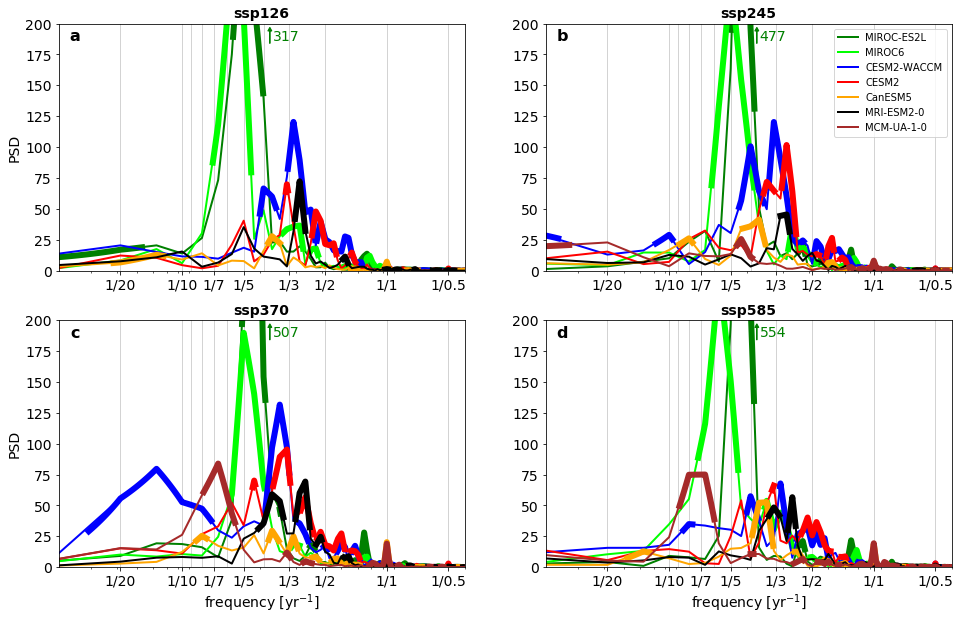

In [48]:
fig, axes = plt.subplots(ncols = 2, nrows = 2, figsize = (8*2,5*2))
axes = np.concatenate(axes)

seg_length = 86*12; nperseg = 40*12
overlap = seg_length - 30*12; 
#color_list = ['Maroon', 'Green', 'Blue', 'Cyan', 'Orange',  'Teal', 'Lime', 'Black', 'Magenta', 'Grey', 'Red']
color_list = ['Green', 'Lime', 'Blue', 'Red', 'Orange', 'Black', 'Brown']
colors = {}

# models are sorted such that those with highest power are plotted first
models2 = ['MIROC-ES2L', 'MIROC6', 'CESM2-WACCM', 'CESM2', 'CanESM5','MRI-ESM2-0', 'MCM-UA-1-0']


for (i,model) in enumerate(models2):
    colors[model] = color_list[i]

# plot vertical lines at given periods:
xcoords = [0.5, 1, 2, 3, 5, 7, 10, 20] # for labels
xcoords2 = [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20] # for lines
for (k,ax) in enumerate(axes):
    for xc in xcoords2:
        #ax.axvline(x=12*xc, color='lightgray', linestyle='--')
        ax.axvline(x=1/(12*xc), color='lightgray', linewidth = 1)
    if k in [2,3]:
        ax.set_xlabel('frequency [yr$^{-1}$]', fontsize = 14)
        #ax.set_xlabel('Period [yrs]', fontsize = 14)
    if k in [0,2]:
        ax.set_ylabel('PSD', fontsize = 14)
    ax.tick_params(axis='both', labelsize = 14)
    ax.set_ylim(0,200)
    ax.set_xlim(1/(40*12), 1/(5))

for model in models2:
    exp = 'piControl'
    x = anomalies[model][exp][:500*12]
    starttimes = np.arange(0,len(x)-seg_length+1,seg_length - overlap)
    segment_list = np.full((len(starttimes), seg_length), np.nan)
    Pxx_list = np.full((len(starttimes), int(nperseg/2)), np.nan)
    for (i,k) in enumerate(starttimes):
        segment = x[k:k+seg_length]; segment_list[i] = segment
        f, Pxx = signal.welch(segment, nperseg=nperseg); Pxx_list[i] = Pxx[1:]
    
    # find min and max values obtained at each frequency:
    min_vals = np.zeros(int(nperseg/2)); max_vals = np.zeros(int(nperseg/2));
    for (i,fi) in enumerate(f[1:]):
        Pxx_i = Pxx_list[:,i]
        min_vals[i] = Pxx_i.min()
        max_vals[i] = Pxx_i.max()    

    for (k, exp) in enumerate(experiments[2:]):
        #print(exp)
        ax = axes[k]
        ax.set_title(exp, fontsize = 14, fontweight = 'bold')
        if exp in anomalies[model]:
            x = anomalies[model][exp]
            f, Pxx = signal.welch(x, nperseg=nperseg);
            thick_lines(f, Pxx, min_vals, max_vals, ax, lw = 6, xaxis = 'frequency', thick_color = colors[model])
            if k==1:
                ax.semilogx(f[1:], Pxx[1:], linewidth = 2, label = model, color = colors[model])
            else:
                ax.semilogx(f[1:], Pxx[1:], linewidth = 2, color = colors[model])
            #ax.semilogx(np.flip(1/f[1:]), np.flip(Pxx[1:]), color = "black", linewidth = 2)
            if model == 'MIROC-ES2L':
                ax.arrow(0.55-0.03, 0.95-0.03, 0, 0.05, head_width=0.01, width = 0.001, color = colors[model], transform=ax.transAxes)
                ax.text(0.56, 0.95, int(np.round(max(Pxx[1:]),0)), fontsize = 14, color = colors[model], horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

plt.setp(axes, xticks=1/(12*np.array(xcoords)), xticklabels=['1/' +str(xcoords[i]) for i in range(len(xcoords))])
#plt.xticks(12*np.array(xcoords),np.array(xcoords))

axes[1].legend(loc = 1)

panels = ['a', 'b', 'c', 'd']
for (i,panel) in enumerate(panels):
    axes[i].text(0.04, 0.95, panel, fontweight = 'bold', fontsize = 16, horizontalalignment='center', verticalalignment='center', transform=axes[i].transAxes);

#plt.savefig('../Figures/Figure1.png', format='png', dpi=300, bbox_inches="tight")
plt.show()



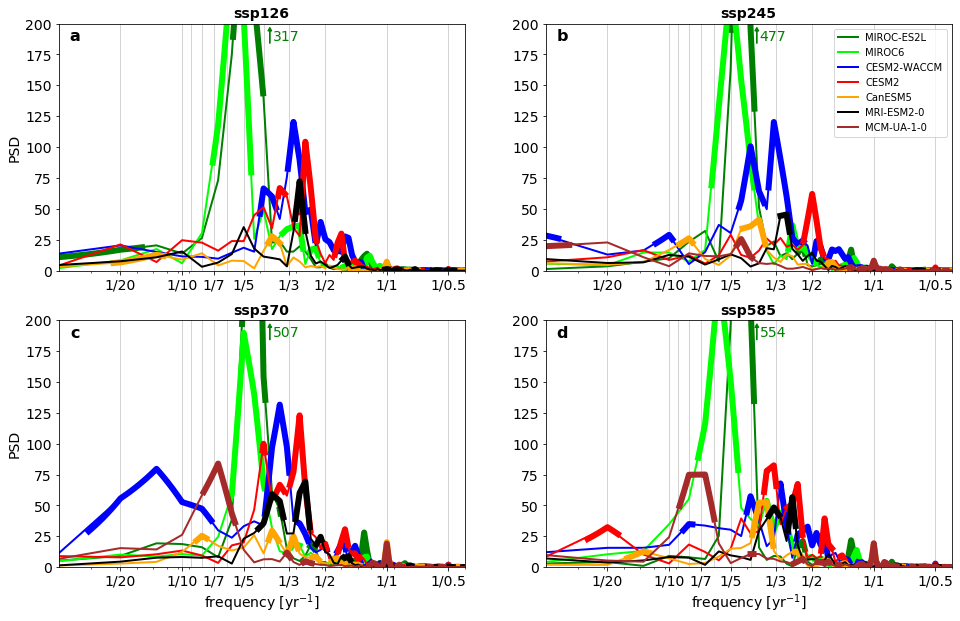

In [56]:
fig, axes = plt.subplots(ncols = 2, nrows = 2, figsize = (8*2,5*2))
axes = np.concatenate(axes)

seg_length = 86*12; nperseg = 40*12
overlap = seg_length - 30*12; 
#color_list = ['Maroon', 'Green', 'Blue', 'Cyan', 'Orange',  'Teal', 'Lime', 'Black', 'Magenta', 'Grey', 'Red']
color_list = ['Green', 'Lime', 'Blue', 'Red', 'Orange', 'Black', 'Brown']
colors = {}

# models are sorted such that those with highest power are plotted first
models2 = ['MIROC-ES2L', 'MIROC6', 'CESM2-WACCM', 'CESM2', 'CanESM5','MRI-ESM2-0', 'MCM-UA-1-0']


for (i,model) in enumerate(models2):
    colors[model] = color_list[i]

# plot vertical lines at given periods:
xcoords = [0.5, 1, 2, 3, 5, 7, 10, 20] # for labels
xcoords2 = [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20] # for lines
for (k,ax) in enumerate(axes):
    for xc in xcoords2:
        #ax.axvline(x=12*xc, color='lightgray', linestyle='--')
        ax.axvline(x=1/(12*xc), color='lightgray', linewidth = 1)
    if k in [2,3]:
        ax.set_xlabel('frequency [yr$^{-1}$]', fontsize = 14)
        #ax.set_xlabel('Period [yrs]', fontsize = 14)
    if k in [0,2]:
        ax.set_ylabel('PSD', fontsize = 14)
    ax.tick_params(axis='both', labelsize = 14)
    ax.set_ylim(0,200)
    ax.set_xlim(1/(40*12), 1/(5))

for model in models2:
    exp = 'piControl'
    x = anomalies[model][exp][:500*12]
    starttimes = np.arange(0,len(x)-seg_length+1,seg_length - overlap)
    segment_list = np.full((len(starttimes), seg_length), np.nan)
    Pxx_list = np.full((len(starttimes), int(nperseg/2)), np.nan)
    for (i,k) in enumerate(starttimes):
        segment = x[k:k+seg_length]; segment_list[i] = segment
        f, Pxx = signal.welch(segment, nperseg=nperseg); Pxx_list[i] = Pxx[1:]
    
    # find min and max values obtained at each frequency:
    min_vals = np.zeros(int(nperseg/2)); max_vals = np.zeros(int(nperseg/2));
    for (i,fi) in enumerate(f[1:]):
        Pxx_i = Pxx_list[:,i]
        min_vals[i] = Pxx_i.min()
        max_vals[i] = Pxx_i.max()    

    for (k, exp) in enumerate(experiments[2:]):
        #print(exp)
        ax = axes[k]
        ax.set_title(exp, fontsize = 14, fontweight = 'bold')
        if exp in anomalies[model]:
            x = anomalies[model][exp]
            f, Pxx = signal.welch(x, nperseg=nperseg);
            thick_lines(f, Pxx, min_vals, max_vals, ax, lw = 6, xaxis = 'frequency', thick_color = colors[model])
            if k==1:
                ax.semilogx(f[1:], Pxx[1:], linewidth = 2, label = model, color = colors[model])
            else:
                ax.semilogx(f[1:], Pxx[1:], linewidth = 2, color = colors[model])
            #ax.semilogx(np.flip(1/f[1:]), np.flip(Pxx[1:]), color = "black", linewidth = 2)
            if model == 'MIROC-ES2L':
                ax.arrow(0.55-0.03, 0.95-0.03, 0, 0.05, head_width=0.01, width = 0.001, color = colors[model], transform=ax.transAxes)
                ax.text(0.56, 0.95, int(np.round(max(Pxx[1:]),0)), fontsize = 14, color = colors[model], horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

plt.setp(axes, xticks=1/(12*np.array(xcoords)), xticklabels=['1/' +str(xcoords[i]) for i in range(len(xcoords))])
#plt.xticks(12*np.array(xcoords),np.array(xcoords))

axes[1].legend(loc = 1)

panels = ['a', 'b', 'c', 'd']
for (i,panel) in enumerate(panels):
    axes[i].text(0.04, 0.95, panel, fontweight = 'bold', fontsize = 16, horizontalalignment='center', verticalalignment='center', transform=axes[i].transAxes);

#plt.savefig('../Figures/Figure2.png', format='png', dpi=300, bbox_inches="tight")
plt.show()



## Separate plots for each model:

BCC-CSM2-MR


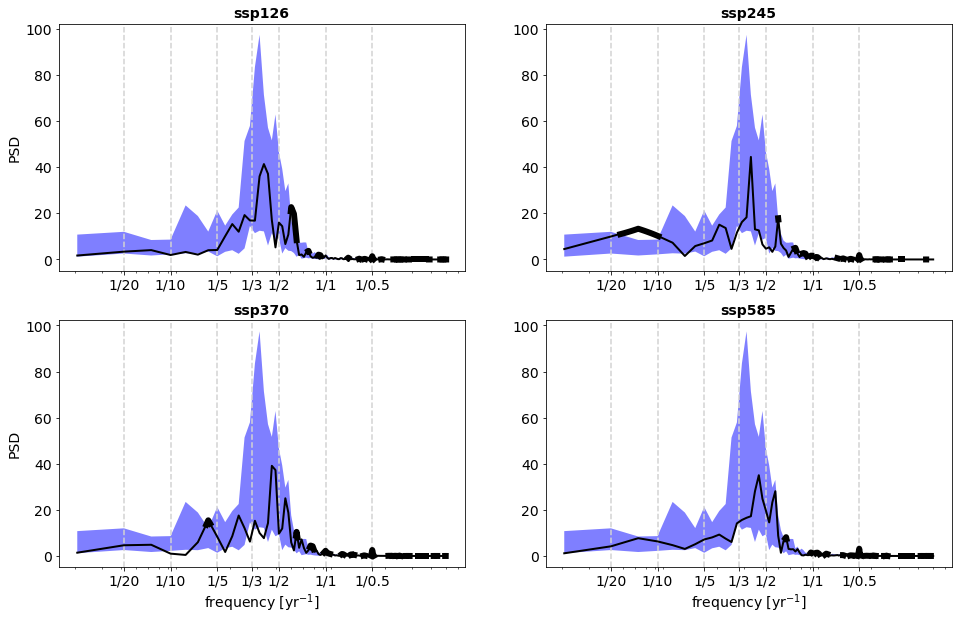

CanESM5


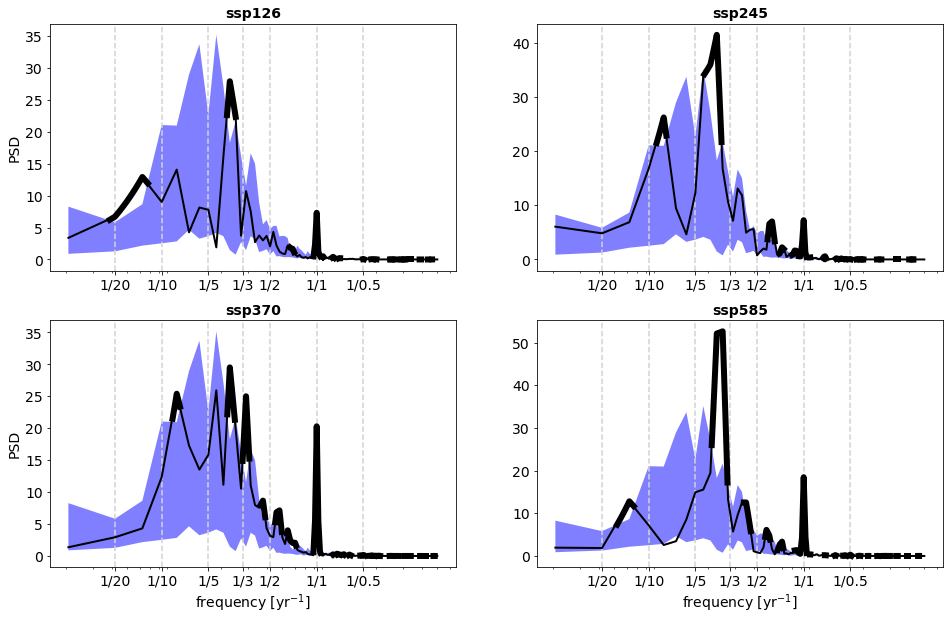

CESM2-WACCM


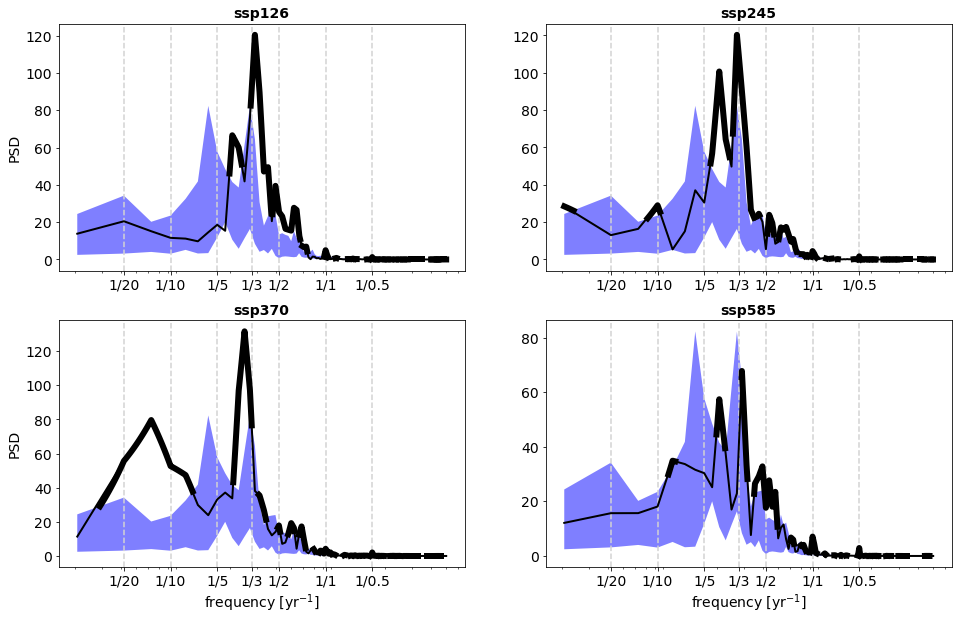

CNRM-CM6-1


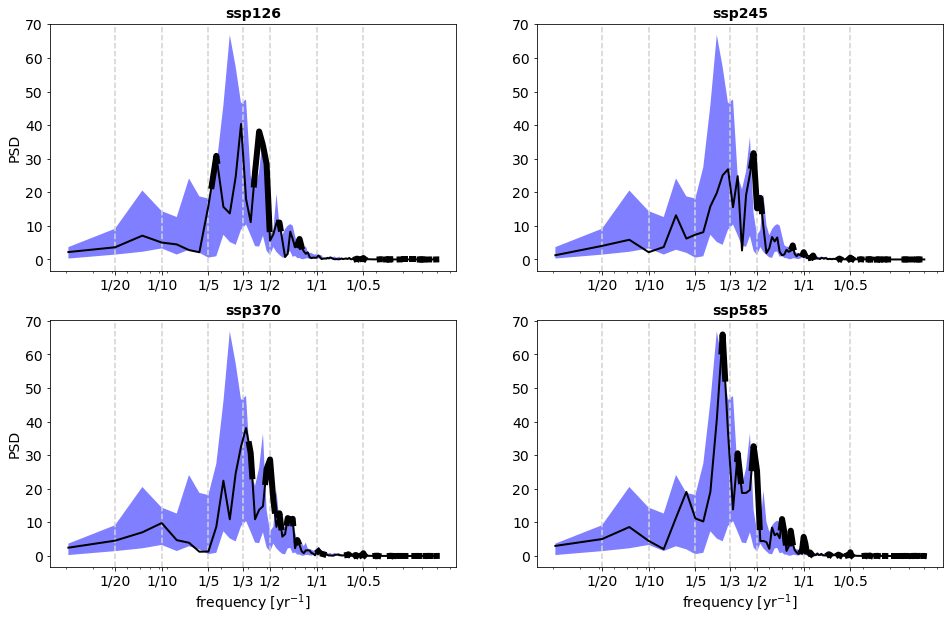

CNRM-ESM2-1


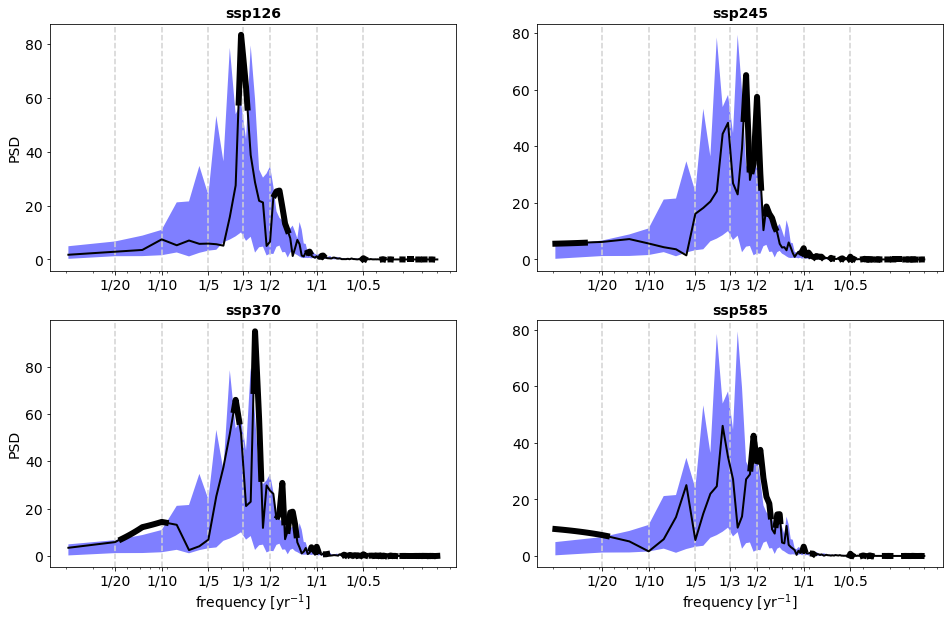

CESM2


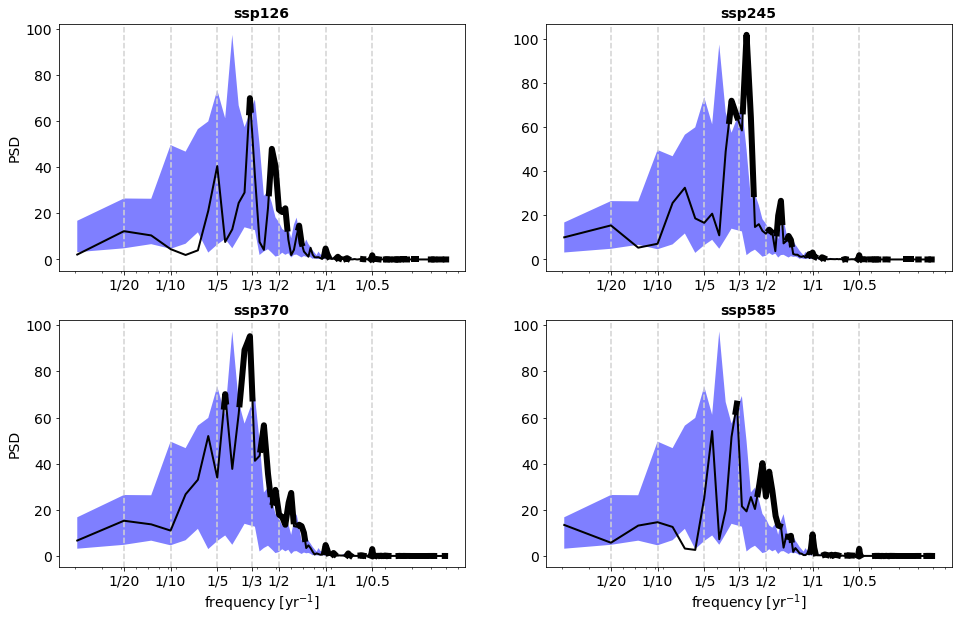

UKESM1-0-LL


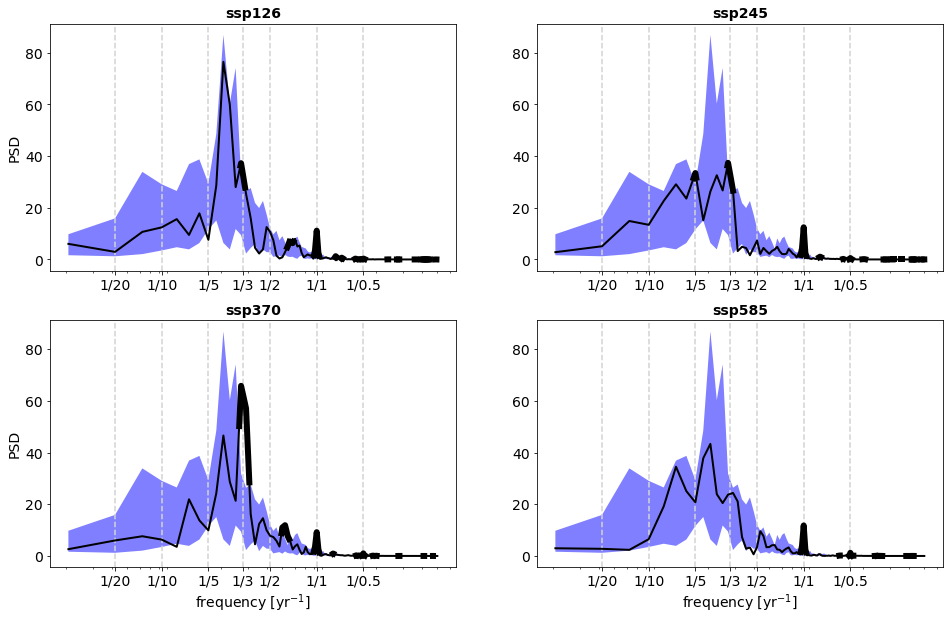

MIROC6


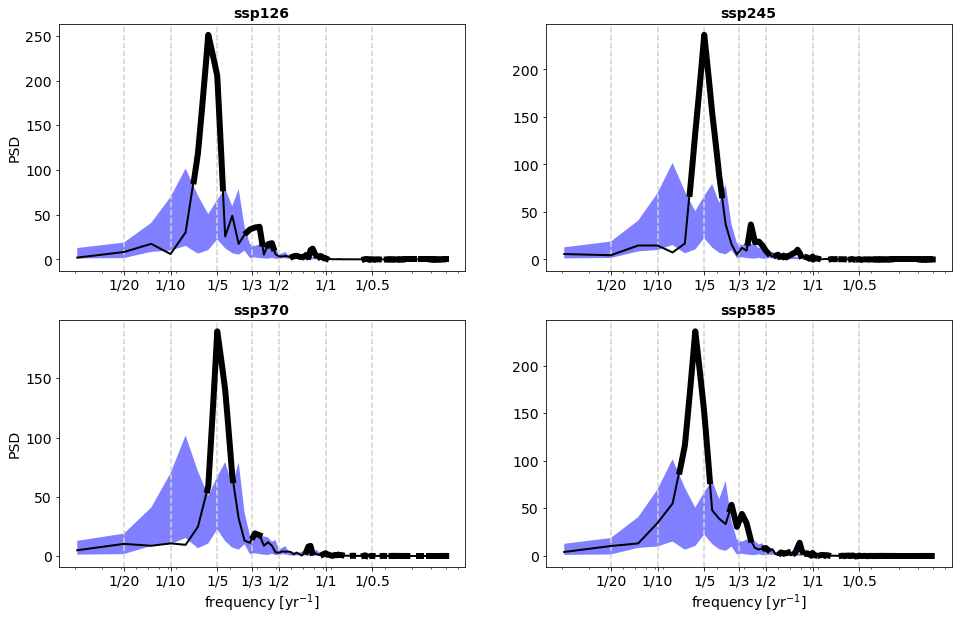

MRI-ESM2-0


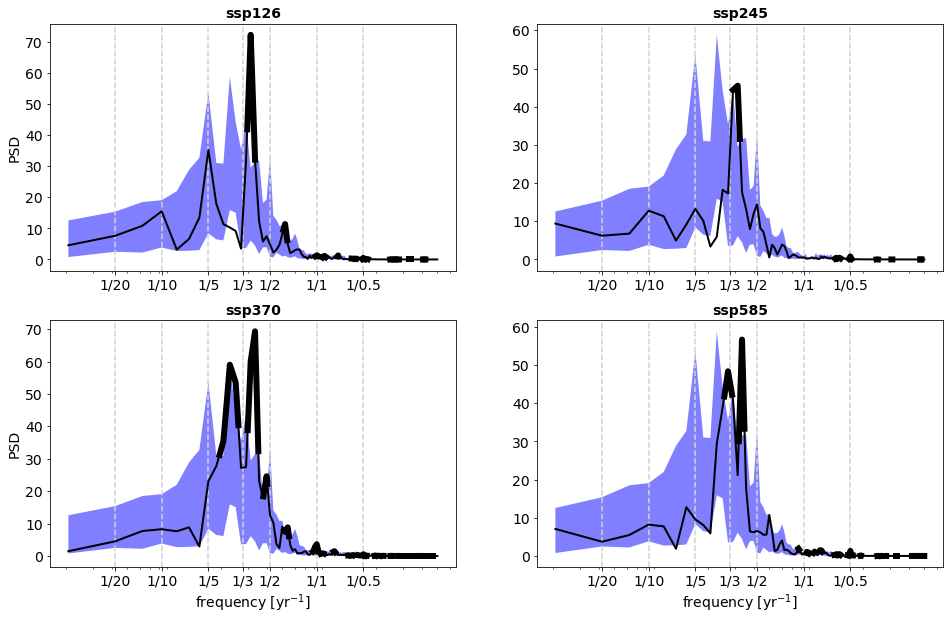

MCM-UA-1-0


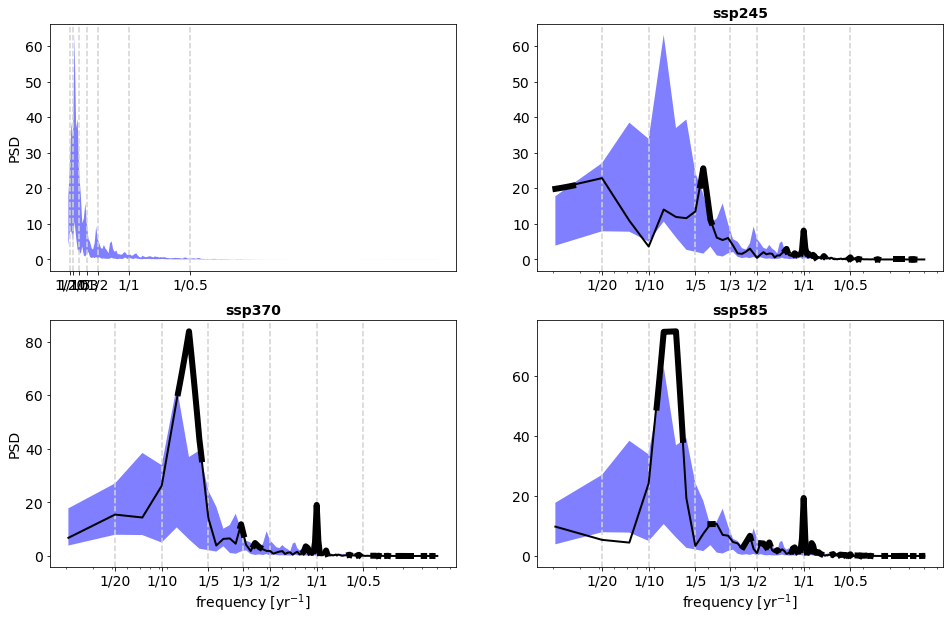

MIROC-ES2L


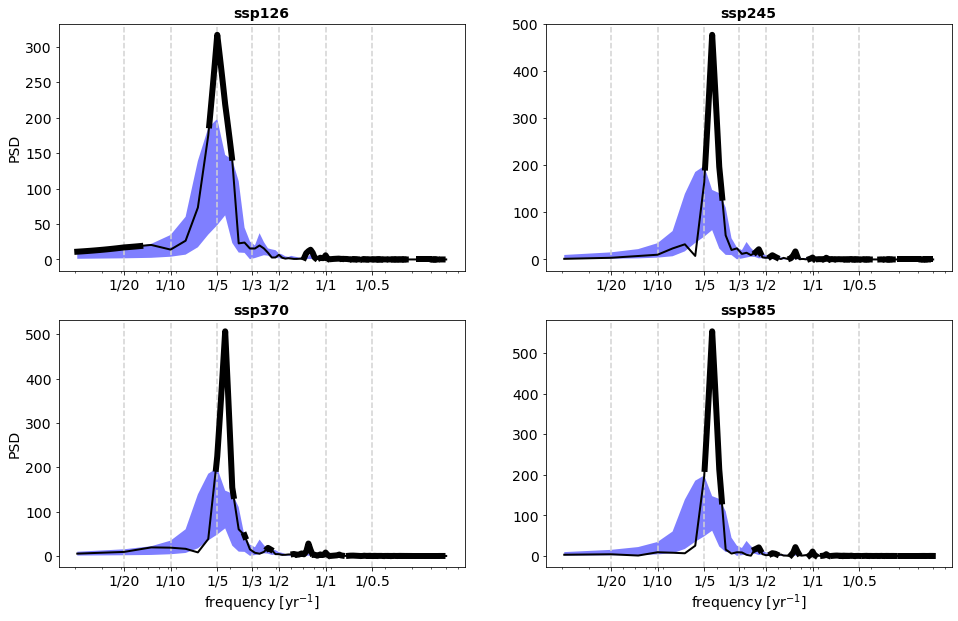

In [28]:
for model in models:
    print(model)

    fig, axes = plt.subplots(ncols = 2, nrows = 2, figsize = (8*2,5*2))
    axes = np.concatenate(axes)
    seg_length = 86*12; nperseg = 40*12
    overlap = seg_length - 30*12; 

    # plot vertical lines at given periods:
    #xcoords = [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20]
    xcoords = [0.5, 1, 2, 3, 5, 10, 20]
    for (k,ax) in enumerate(axes):
        for xc in xcoords:
            #ax.axvline(x=12*xc, color='lightgray', linestyle='--')
            ax.axvline(x=1/(12*xc), color='lightgray', linestyle='--')
        if k in [2,3]:
            ax.set_xlabel('frequency [yr$^{-1}$]', fontsize = 14)
            #ax.set_xlabel('Period [yrs]', fontsize = 14)
        if k in [0,2]:
            ax.set_ylabel('PSD', fontsize = 14)
        ax.tick_params(axis='both', labelsize = 14)
        #ax.set_ylim(0,220)
        #ax.set_xlim(1/(40*12), 1/(5))

    exp = 'piControl'
    x = anomalies[model][exp][:500*12]
    starttimes = np.arange(0,len(x)-seg_length+1,seg_length - overlap)
    segment_list = np.full((len(starttimes), seg_length), np.nan)
    Pxx_list = np.full((len(starttimes), int(nperseg/2)), np.nan)
    for (i,k) in enumerate(starttimes):
        segment = x[k:k+seg_length]; segment_list[i] = segment
        f, Pxx = signal.welch(segment, nperseg=nperseg); Pxx_list[i] = Pxx[1:]

    # find min and max values obtained at each frequency:
    min_vals = np.zeros(int(nperseg/2)); max_vals = np.zeros(int(nperseg/2));
    for (i,fi) in enumerate(f[1:]):
        Pxx_i = Pxx_list[:,i]
        min_vals[i] = Pxx_i.min()
        max_vals[i] = Pxx_i.max()


    for ax in axes:
        #ax.fill_between(np.flip(1/f[1:]), np.flip(min_vals), np.flip(max_vals), facecolor='blue', alpha=0.5)   
        ax.fill_between(f[1:], min_vals, max_vals, facecolor='blue', alpha=0.5)       

    for (k, exp) in enumerate(experiments[2:]):
        ax = axes[k]
        if exp in anomalies[model]:
            x = anomalies[model][exp]
            f, Pxx = signal.welch(x, nperseg=nperseg);
            ax.set_title(exp, fontsize = 14, fontweight = 'bold')
            ax.semilogx(f[1:], Pxx[1:], color = "black", linewidth = 2)
            #ax.semilogx(np.flip(1/f[1:]), np.flip(Pxx[1:]), color = "black", linewidth = 2)
            thick_lines(f, Pxx, min_vals, max_vals, ax, lw = 6, xaxis = 'frequency')

    plt.setp(axes, xticks=1/(12*np.array(xcoords)), xticklabels=['1/' +str(xcoords[i]) for i in range(len(xcoords))])
    #plt.xticks(12*np.array(xcoords),np.array(xcoords))

    plt.show()



## Figure with only piControl spectra

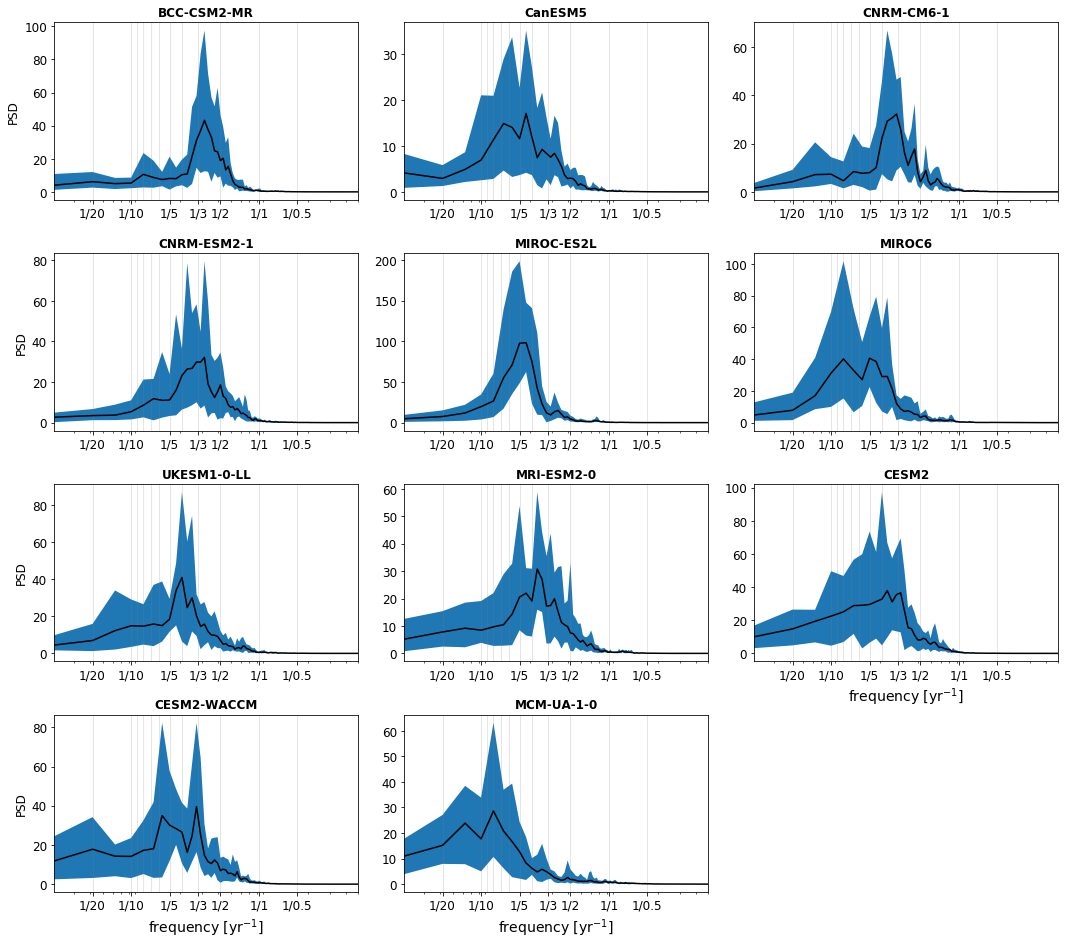

In [92]:

seg_length = 86*12; nperseg = 40*12
overlap = seg_length - 30*12; 

fig, axes = plt.subplots(ncols = 3, nrows = 4, figsize = (18,16))
axes = np.concatenate(axes)
xcoords = [0.5, 1, 2, 3, 5, 10, 20] # for labels
xcoords2 = [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20] # for lines
for (j, model) in enumerate(models):
    ax = axes[j]
    # plot vertical lines at given periods:
    for xc in xcoords2:
        ax.axvline(x=1/(12*xc), color='gray', linewidth = 1, alpha = 0.2)
    if j in [8,9,10]:
        ax.set_xlabel('frequency [yr$^{-1}$]', fontsize = 14)
    if j in [0,3,6,9]:
        ax.set_ylabel('PSD', fontsize = 12)
    ax.tick_params(axis='both', labelsize = 12)
    ax.set_title(model, fontweight = 'bold')
    ax.set_xlim(1/(40*12), 1/2)

    exp = 'piControl'
    x = anomalies[model][exp][:500*12]
    starttimes = np.arange(0,len(x)-seg_length+1,seg_length - overlap)
    segment_list = np.full((len(starttimes), seg_length), np.nan)
    Pxx_list = np.full((len(starttimes), int(nperseg/2)), np.nan)
    for (i,k) in enumerate(starttimes):
        segment = x[k:k+seg_length]; segment_list[i] = segment
        f, Pxx = signal.welch(segment, nperseg=nperseg); Pxx_list[i] = Pxx[1:]
        
    # find min and max values obtained at each frequency:
    min_vals = np.zeros(int(nperseg/2)); max_vals = np.zeros(int(nperseg/2));
    for (i,fi) in enumerate(f[1:]):
        Pxx_i = Pxx_list[:,i]
        min_vals[i] = Pxx_i.min()
        max_vals[i] = Pxx_i.max()

    ax.fill_between(f[1:], min_vals, max_vals) 
    f, Pxx_den = signal.welch(x, nperseg=40*12) # PSD using all 500 years
    ax.semilogx(f[1:], Pxx_den[1:], color = "black")

plt.setp(axes, xticks=1/(12*np.array(xcoords)), xticklabels=['1/' +str(xcoords[i]) for i in range(len(xcoords))])
fig.delaxes(axes[-1])
plt.subplots_adjust(hspace=0.3, wspace = 0.15)

#plt.savefig('../Figures/supp_spectra.png', format='png', dpi=300, bbox_inches="tight")

plt.show()